#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

### 1. Importing Libraries and data:

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt,  seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
house = pd.read_csv("train.csv")
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### 2. Data Understanding:

In [5]:
house.shape

(1460, 81)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# int  to cat: MSSubClass, OverallQual, OverallCond coversions:

house["MSSubClass"] = house["MSSubClass"].astype("object")
house["OverallQual"] = house["OverallQual"].astype("object")
house["OverallCond"] = house["OverallCond"].astype("object")

In [8]:
((house.isnull().sum()/house.shape[0])*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

##### 2.1 Null value treatment:

In [9]:
# PoolQC
house["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [10]:
house["PoolQC"]=house["PoolQC"].fillna("No Pool")
house["PoolQC"].value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [11]:
# MiscFeature:
house = house.drop("MiscFeature", axis=1)

In [12]:
# Alley:
house["Alley"] = house["Alley"].fillna("No Alley Access")

In [13]:
house["Alley"].value_counts()

No Alley Access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [14]:
#Fence:
house["Fence"] = house["Fence"].fillna("No Fence")
house["Fence"].value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [15]:
#FireplaceQu:
house["FireplaceQu"] = house["FireplaceQu"].fillna("No Fire Place")

In [16]:
house["FireplaceQu"].value_counts()

No Fire Place    690
Gd               380
TA               313
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

In [17]:
# LotFrontage:
house["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
house["LotFrontage"] = house["LotFrontage"].fillna(house["LotFrontage"].median())
house["LotFrontage"].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [19]:
# GarageYrBlt:
print(house["GarageYrBlt"].describe())

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


In [20]:
house["GarageYrBlt"].nunique()

97

In [21]:
house["GarageYrBlt"] = house["GarageYrBlt"].fillna(house["GarageYrBlt"].median())


In [22]:
#GarageCond:
house["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [23]:
house["GarageCond"] = house["GarageCond"].fillna("No Garage")
house["GarageCond"].value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [24]:
# GarageType:
house["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [25]:
house["GarageType"] = house["GarageType"].fillna("No Garage")
house["GarageType"].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [26]:
# GarageFinish:
house["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [27]:
house["GarageFinish"] = house["GarageFinish"].fillna("No Garage")
house["GarageFinish"].value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [28]:
house["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [29]:
house["GarageQual"] = house["GarageQual"].fillna("No Garage")

In [30]:
# Droppping records from BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1, MasVnrArea, MasVnrType, Electrical:
house = house[~house["BsmtFinType2"].isna()]

In [31]:
house = house[~house["BsmtExposure"].isna()]

In [32]:
house = house[~house["MasVnrArea"].isna()]

In [33]:
house = house[~house["Electrical"].isna()]

In [34]:
house.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

### 3. Exploratory Data Analysis:

##### 3.1 Univariate Analysis:

In [35]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [36]:
house_numericals = house.select_dtypes(include=["int64", "float64"])
house_numericals.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000

In [37]:
house_categoricals = house.select_dtypes(include = "object")
house_categoricals.head()

MSSubClass MSZoning Street            Alley LotShape LandContour Utilities  \
0         60       RL   Pave  No Alley Access      Reg         Lvl    AllPub   
1         20       RL   Pave  No Alley Access      Reg         Lvl    AllPub   
2         60       RL   Pave  No Alley Access      IR1         Lvl    AllPub   
3         70       RL   Pave  No Alley Access      IR1         Lvl    AllPub   
4         60       RL   Pave  No Alley Access      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional    FireplaceQu GarageType GarageFinish GarageQual  \
0          Gd        Typ  No Fire Place     Attchd          RFn         TA   
1          TA        Typ             TA     Attchd          RFn         TA   
2          Gd        Typ             TA     Attchd          RFn         TA   
3          Gd        Typ             Gd     Detchd          Unf         TA   
4          Gd        Typ             TA     Attchd          RFn         TA   

  GarageCond PavedDrive   PoolQC     Fence SaleType SaleCondition  
0         TA          Y  No Pool  No Fence       WD        Normal  
1         TA          Y  No Pool  No Fence       WD        Normal  
2         TA          Y  No Pool  No Fence       WD        Normal  
3         TA          Y  No Pool  No Fence       WD       Abnorml  
4         TA          Y  No Pool  No Fence       WD        Normal

In [38]:
#SalePrice:
house["SalePrice"].describe()

count      1412.000000
mean     182507.021955
std       79270.416057
min       34900.000000
25%      131475.000000
50%      164600.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

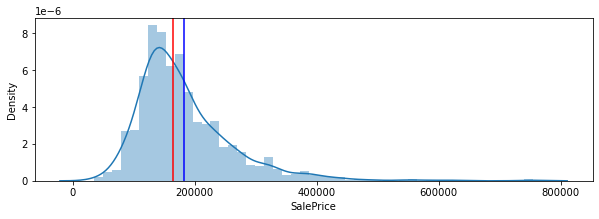

In [39]:
plt.figure(figsize=(10,3))
sns.distplot(house["SalePrice"])
plt.axvline(x = house["SalePrice"].median(), c="r")
plt.axvline(x = house["SalePrice"].mean(), c = "b")
plt.show()

SalePrice Follows Normal Distribution with little Skew-ness

<AxesSubplot:xlabel='SalePrice'>

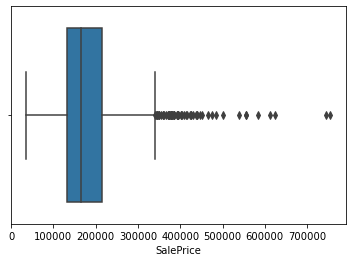

In [40]:
sns.boxplot(house["SalePrice"])

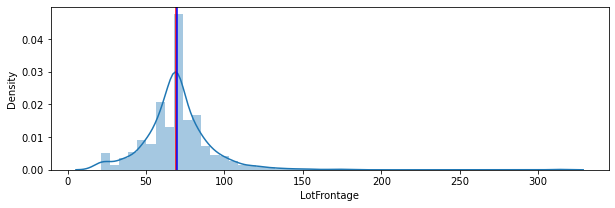

In [41]:
plt.figure(figsize=(10,3))
sns.distplot(house["LotFrontage"])
plt.axvline(x = house["LotFrontage"].median(), c="r")
plt.axvline(x = house["LotFrontage"].mean(), c = "b")
plt.show()

<AxesSubplot:xlabel='LotFrontage'>

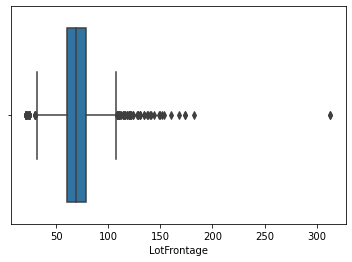

In [42]:
sns.boxplot(house["LotFrontage"])

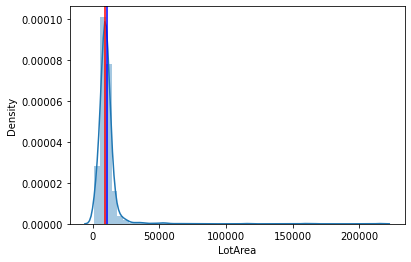

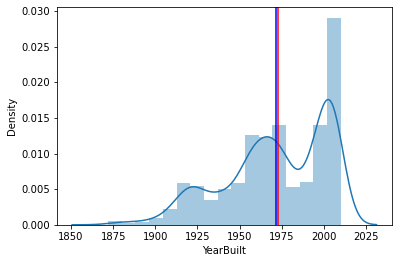

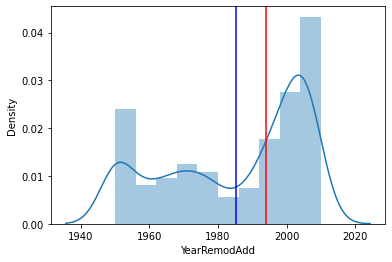

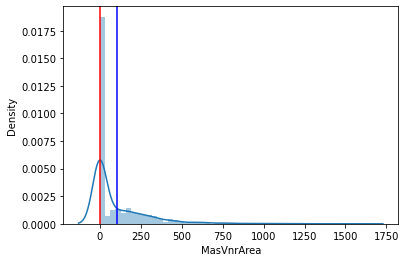

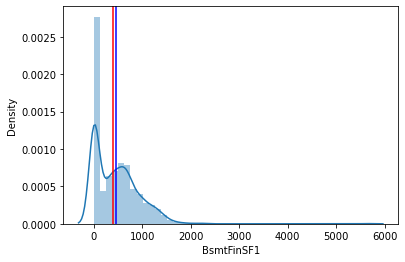

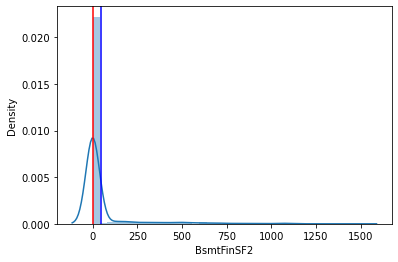

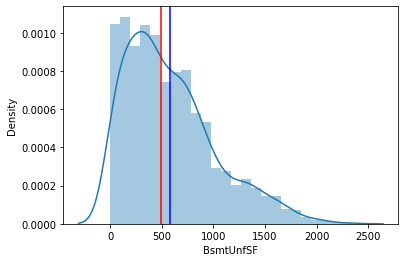

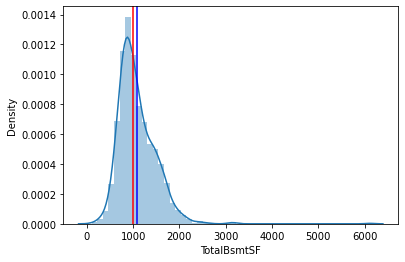

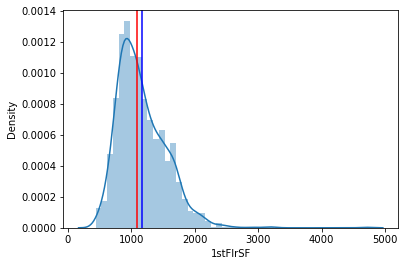

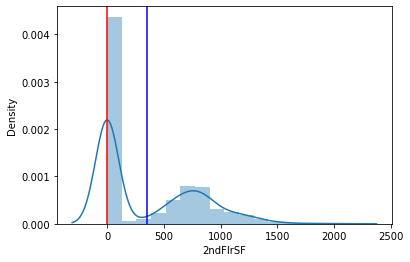

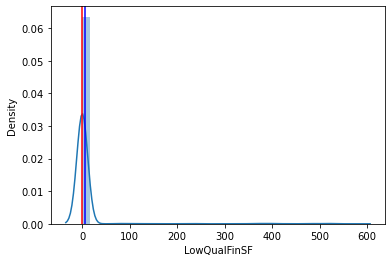

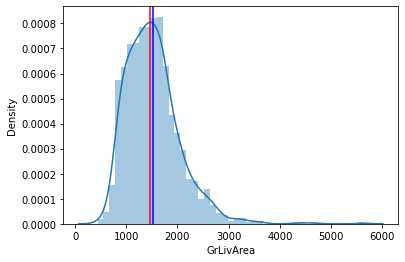

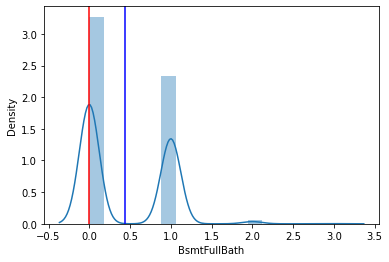

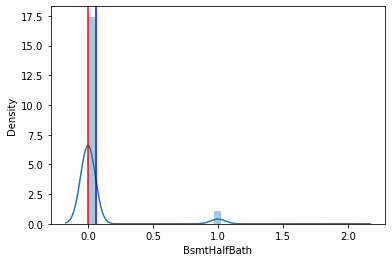

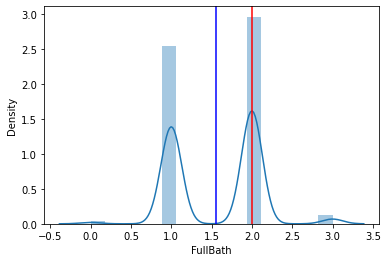

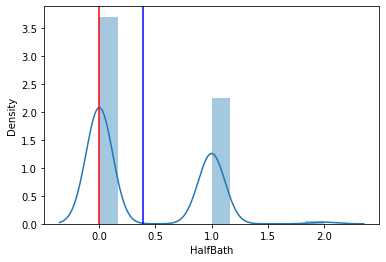

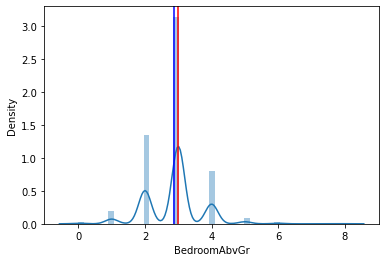

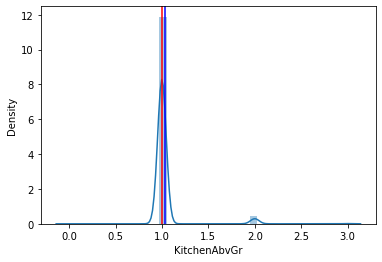

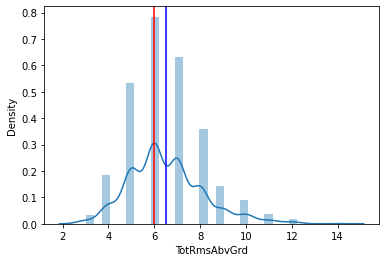

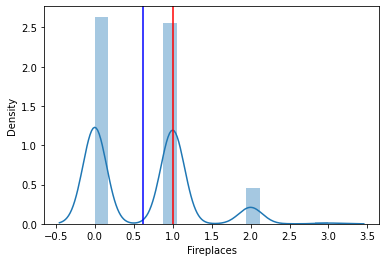

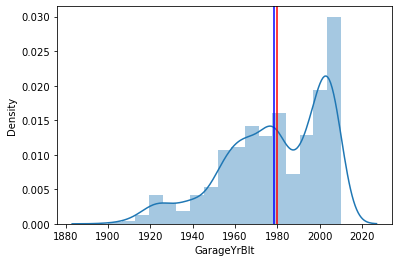

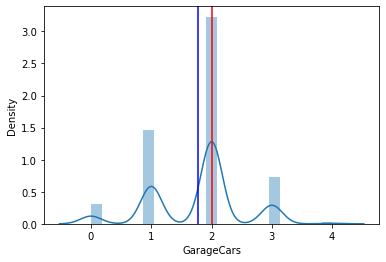

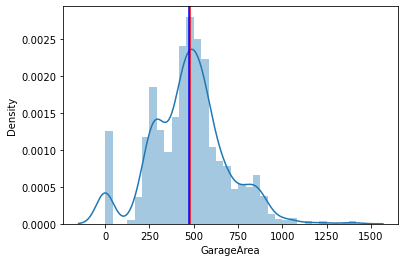

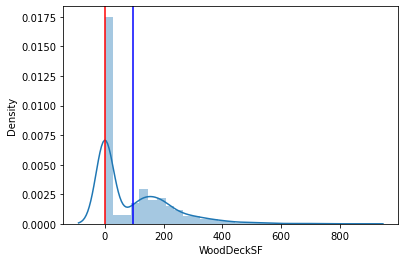

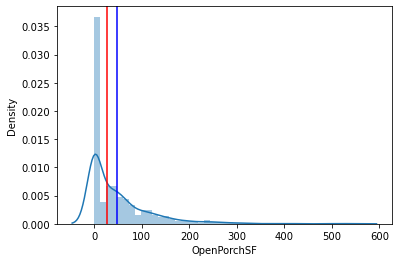

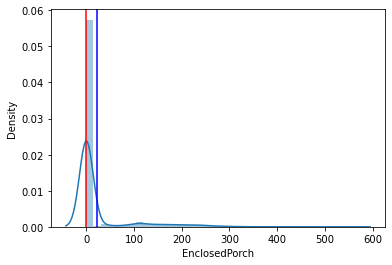

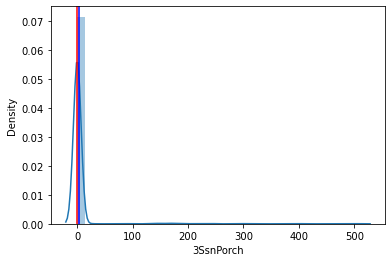

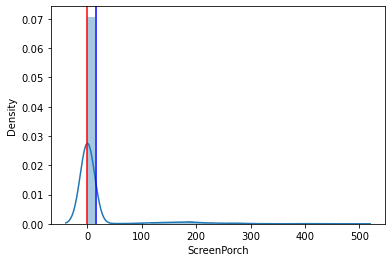

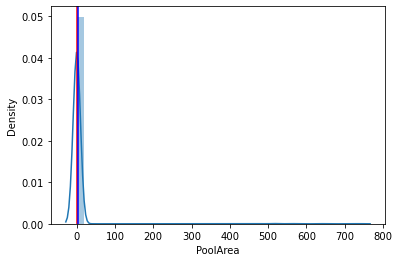

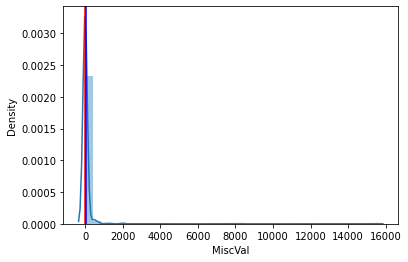

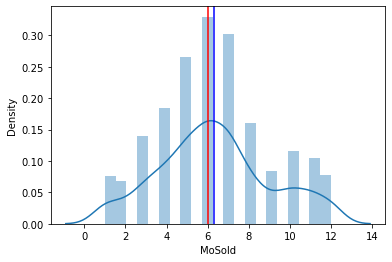

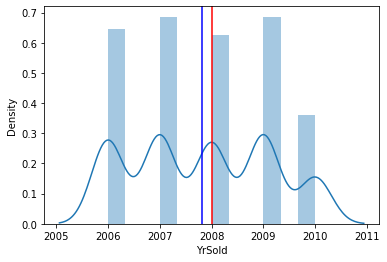

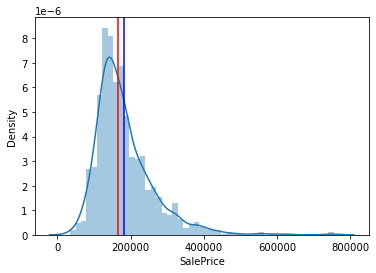

In [43]:
# Distribution plots:
for i in house_numericals.columns[2:]:
    sns.distplot(house[i])
    plt.axvline(house[i].median(), c = "r")
    plt.axvline(house[i].mean(), c = "b")
    plt.show()

LotArea, TotalBsmntSF, GrLivArea, EnclosedPorch Features are Normally Distributed

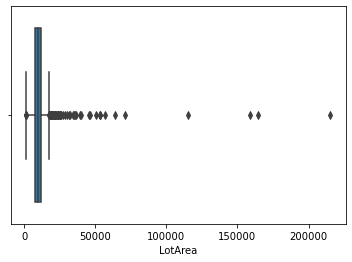

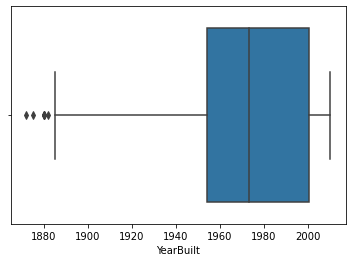

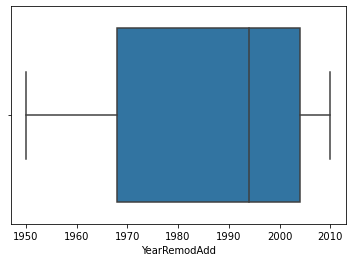

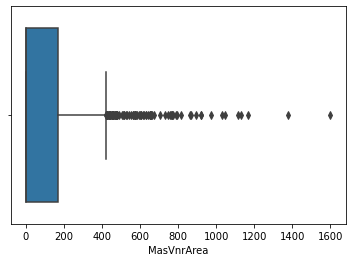

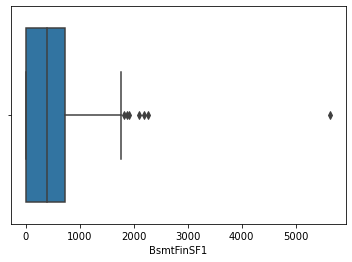

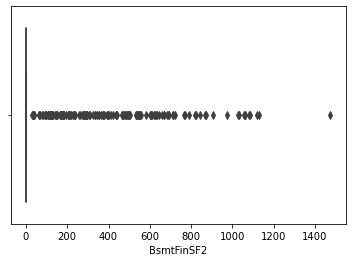

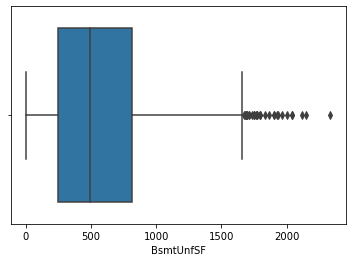

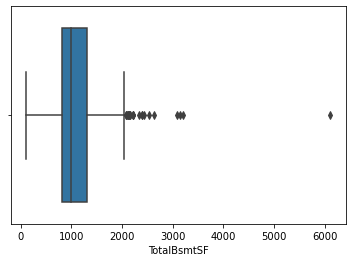

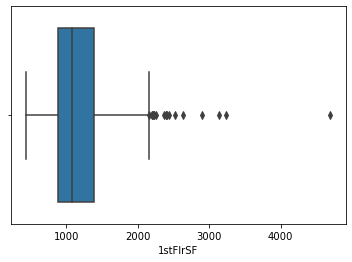

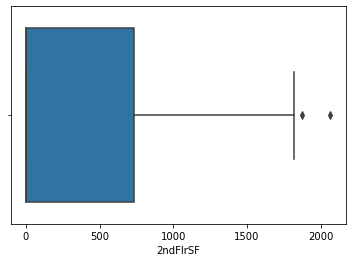

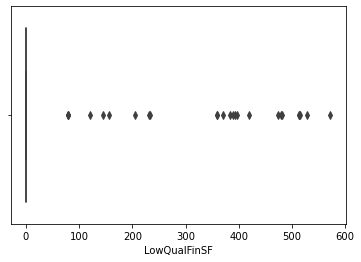

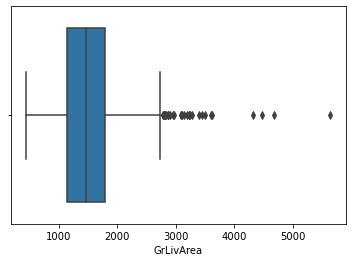

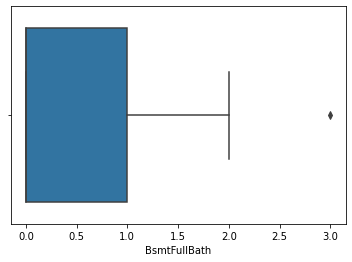

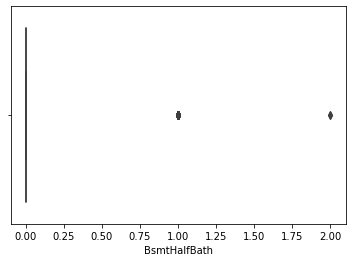

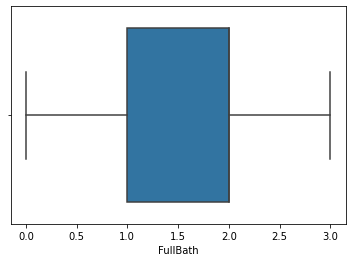

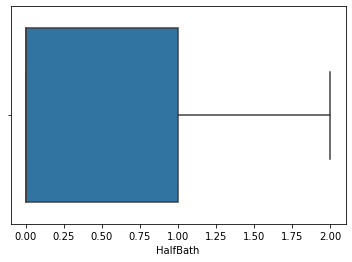

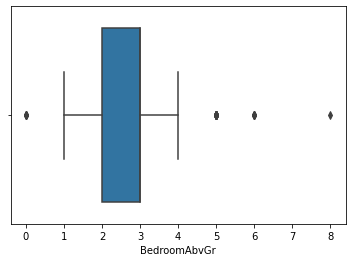

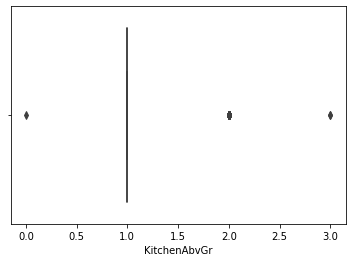

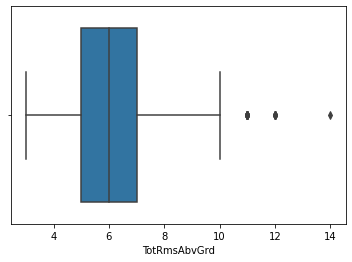

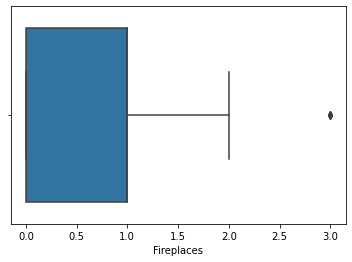

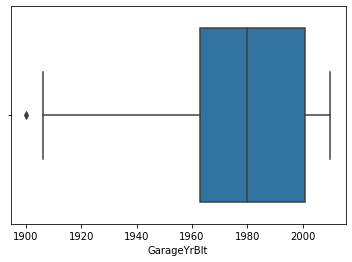

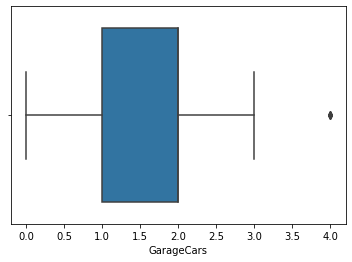

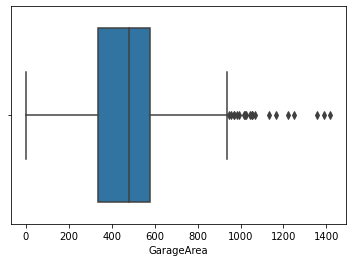

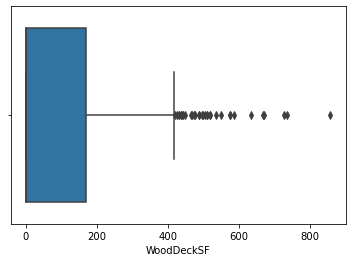

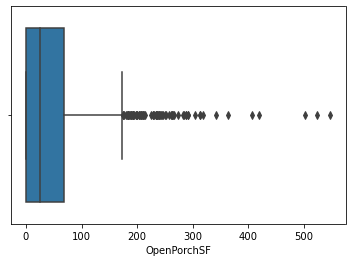

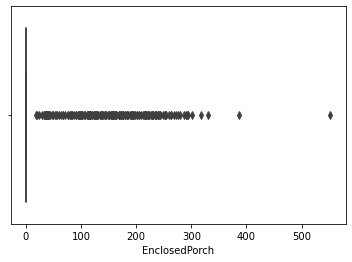

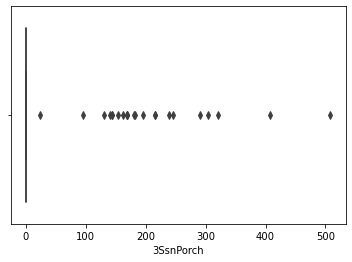

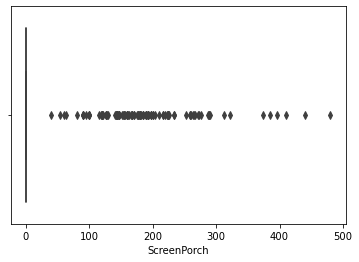

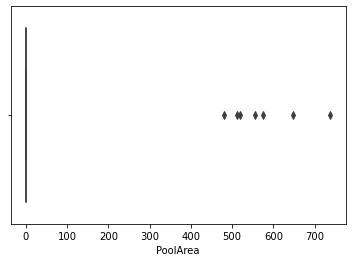

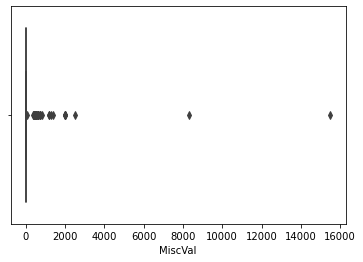

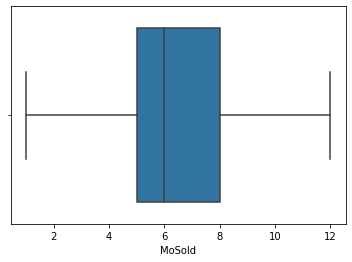

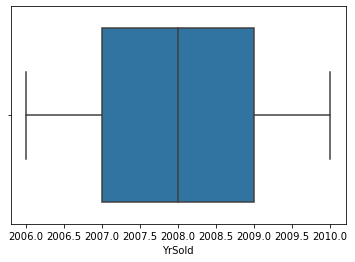

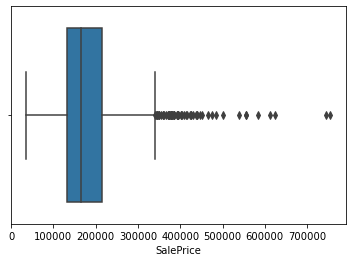

In [44]:
# Box Plots:
for i in house_numericals.columns[2:]:
    sns.boxplot(house[i])
    plt.show()

In [45]:
# Outliers Treatment:



def drop_outliers(x):
    list = []
    for col in house_numericals:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house = drop_outliers(house)

In [46]:
house_categoricals.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

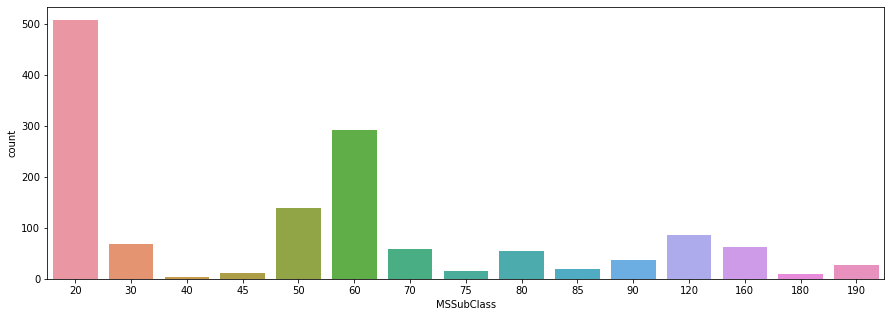

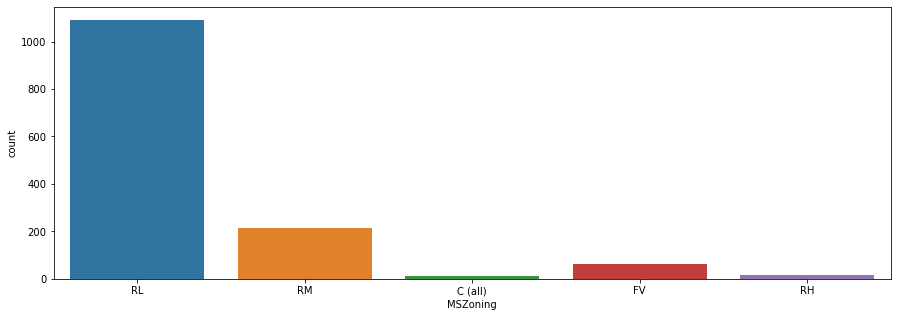

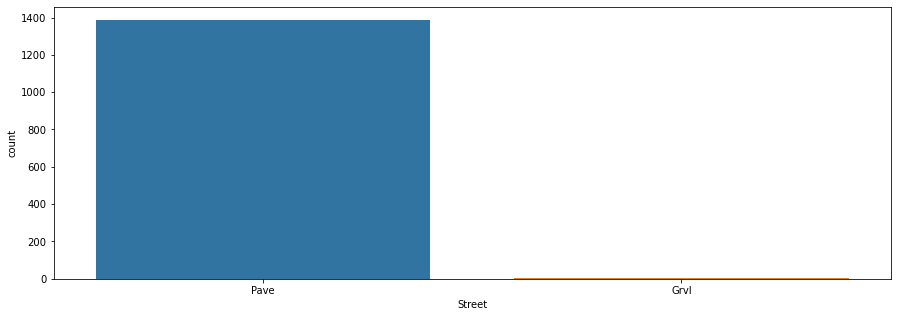

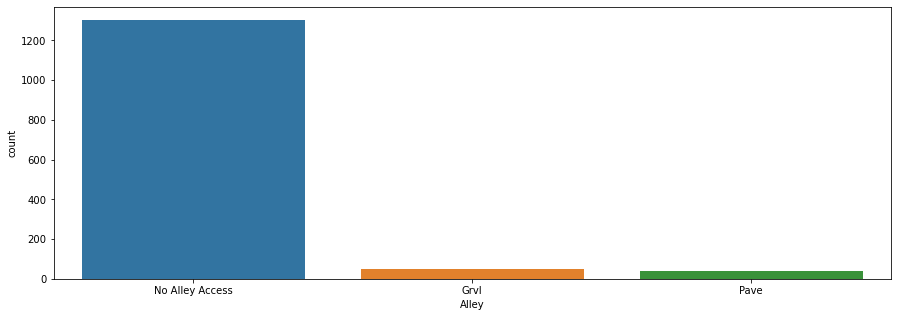

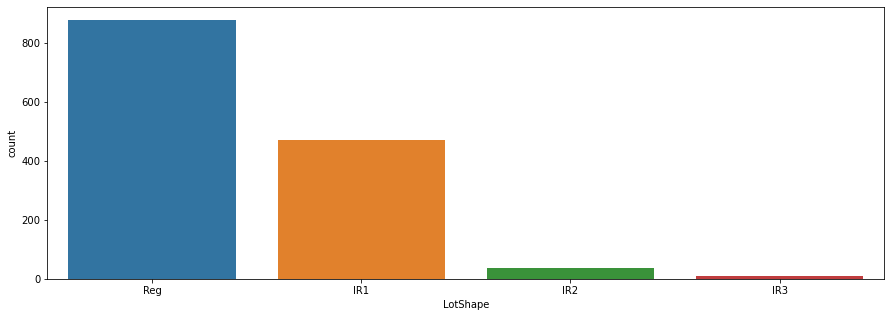

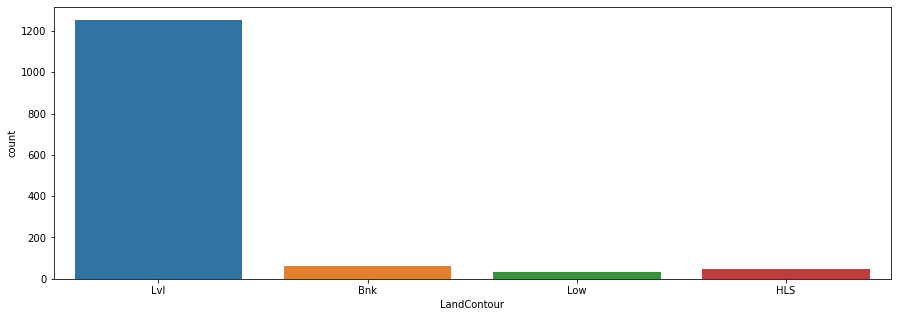

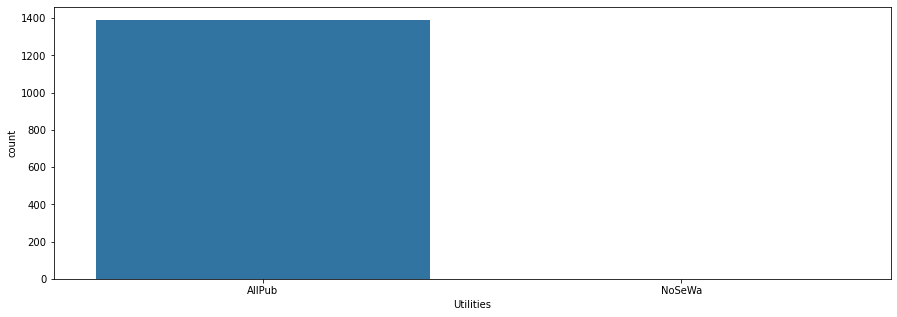

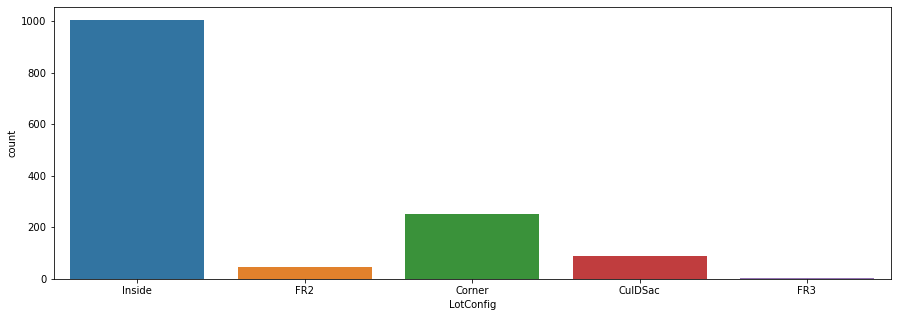

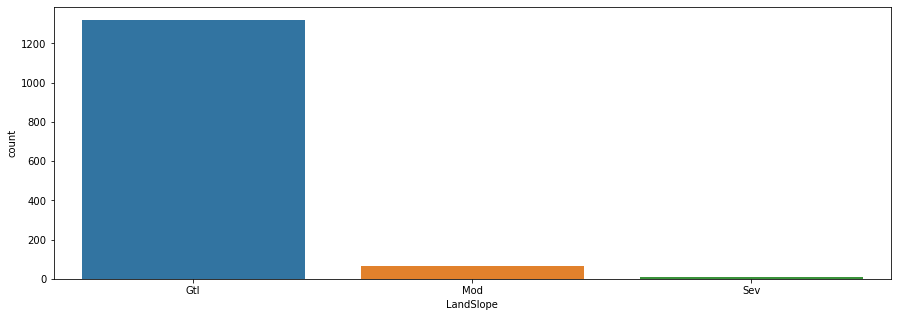

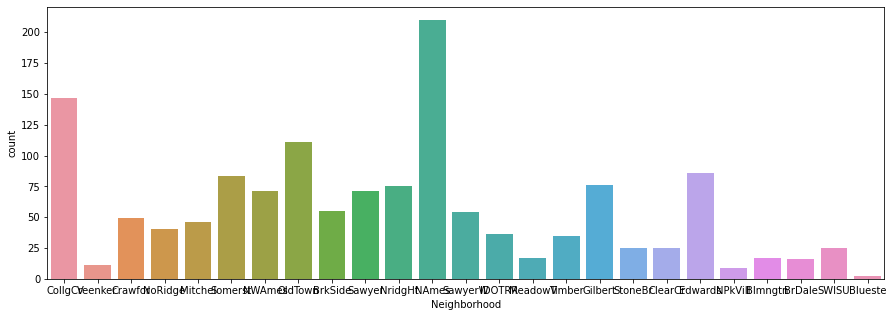

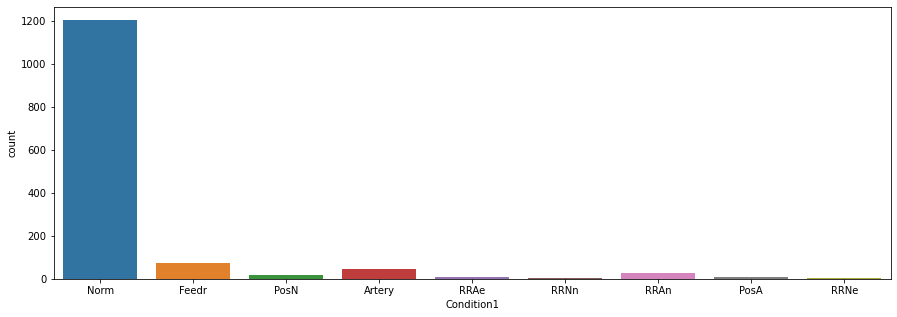

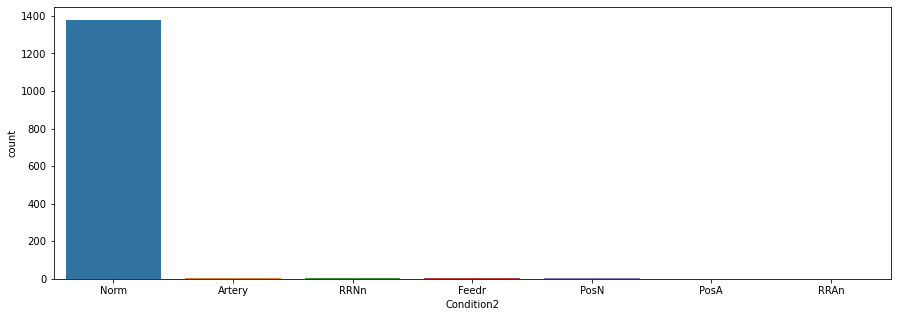

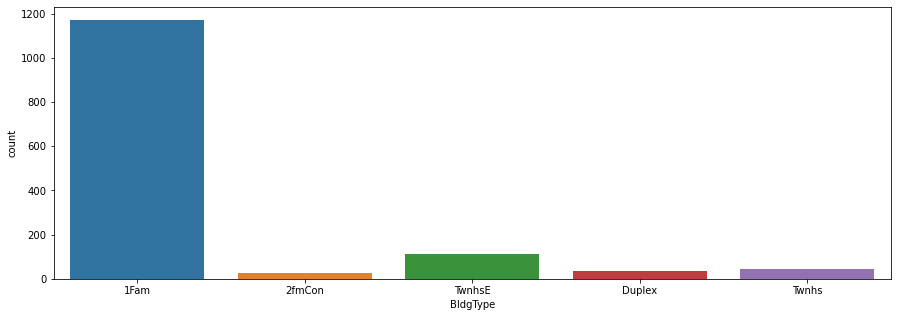

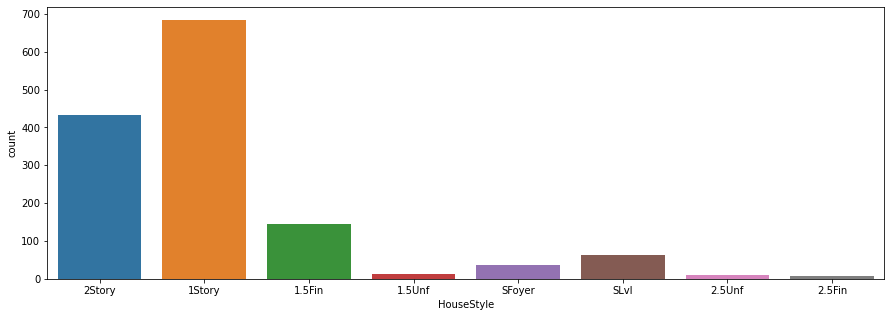

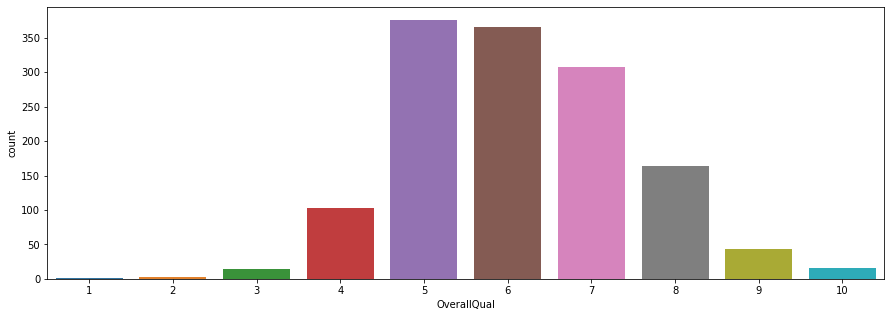

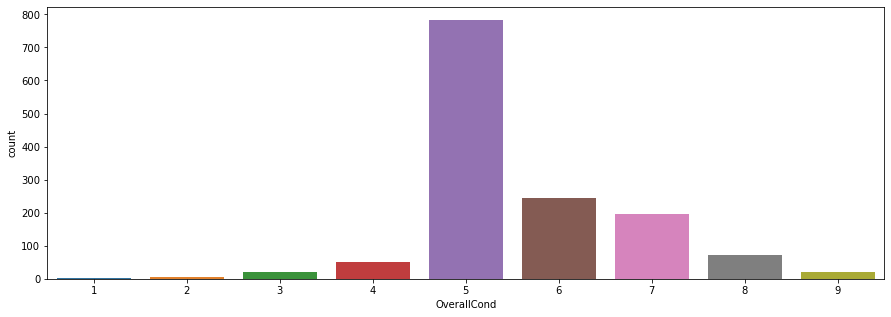

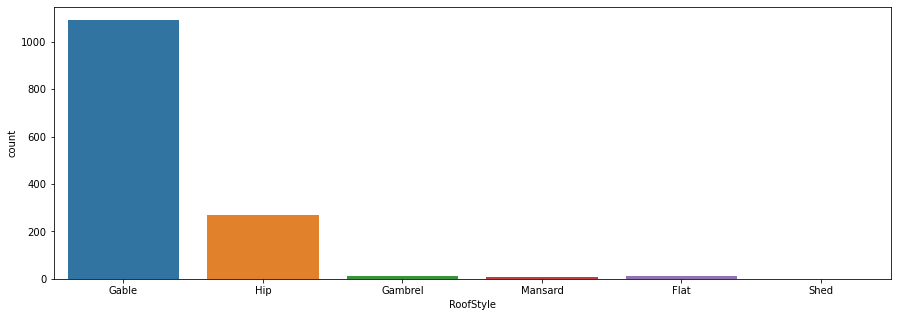

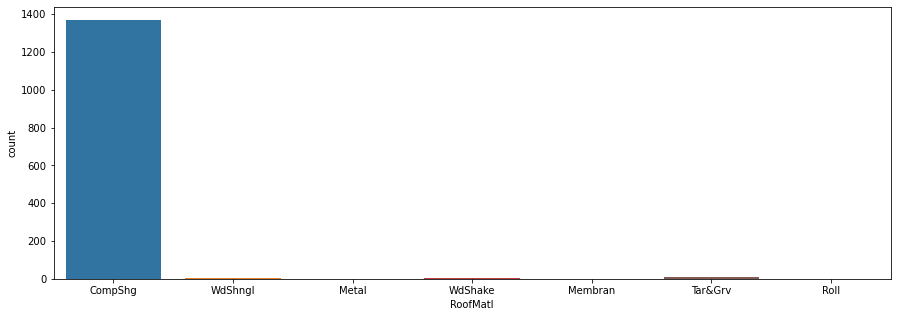

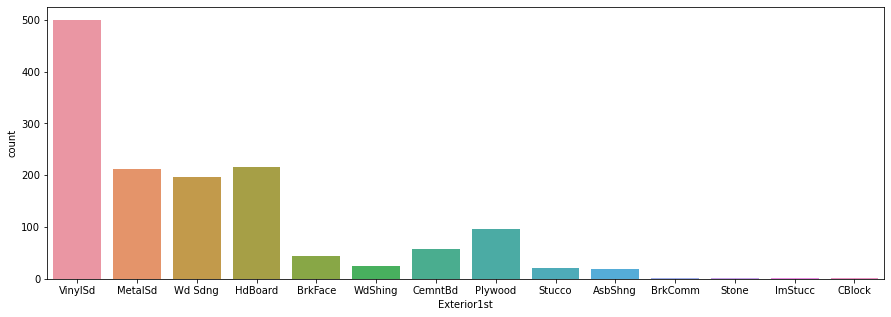

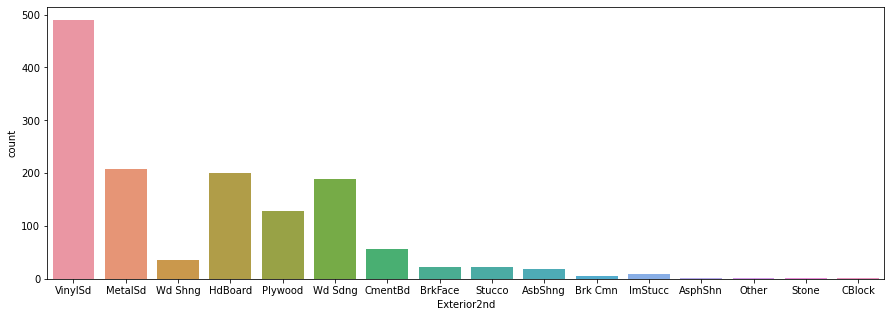

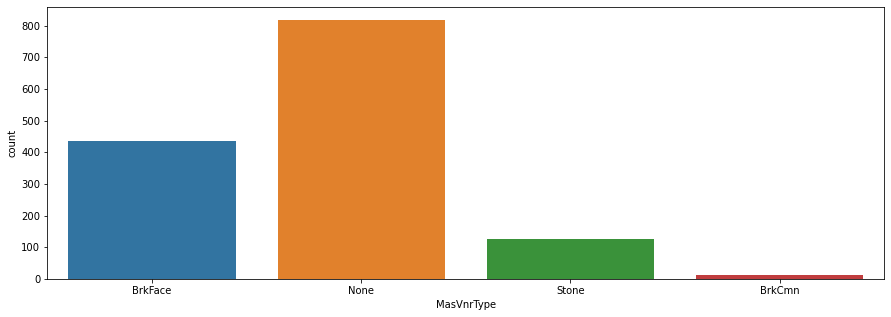

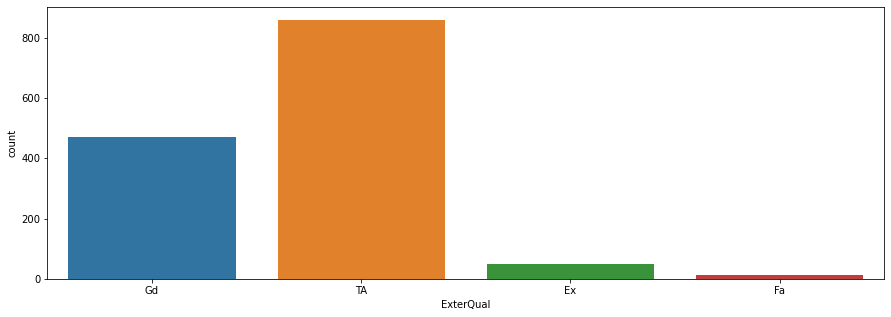

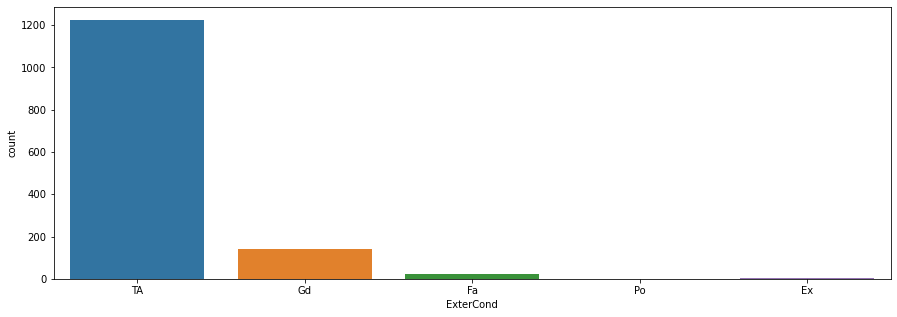

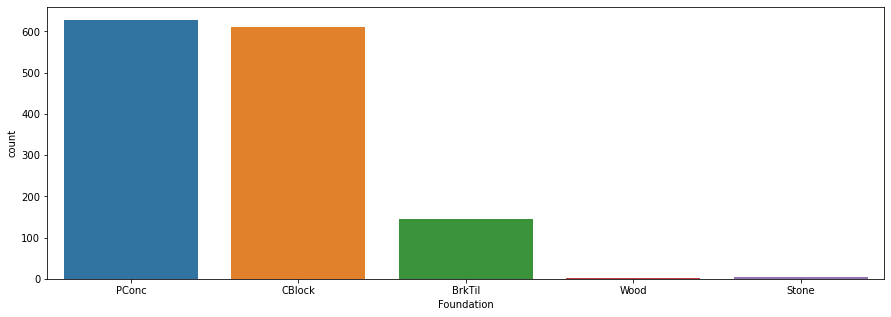

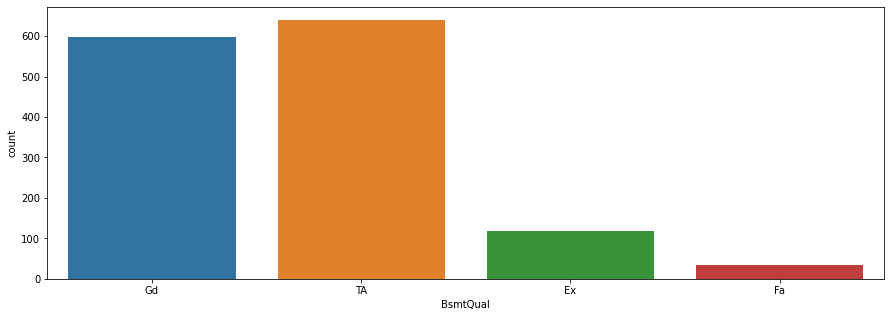

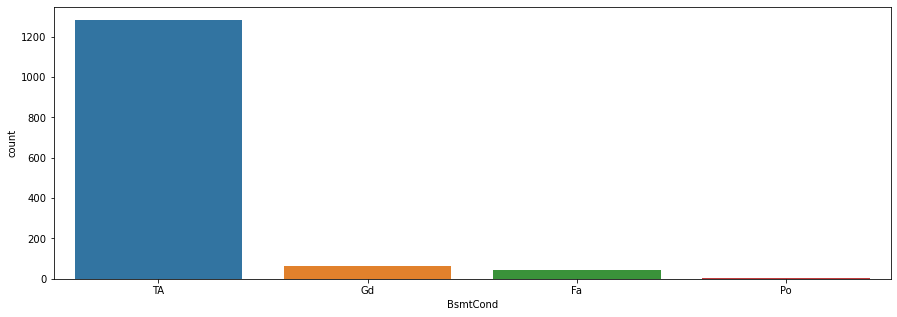

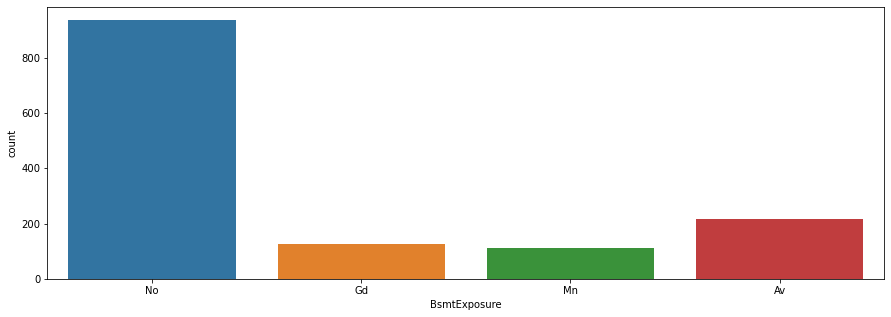

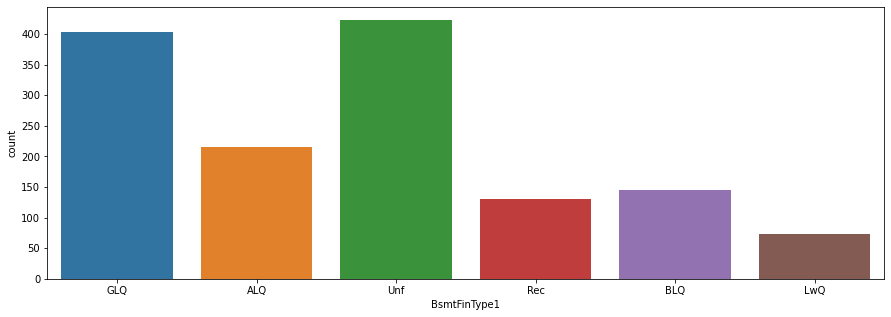

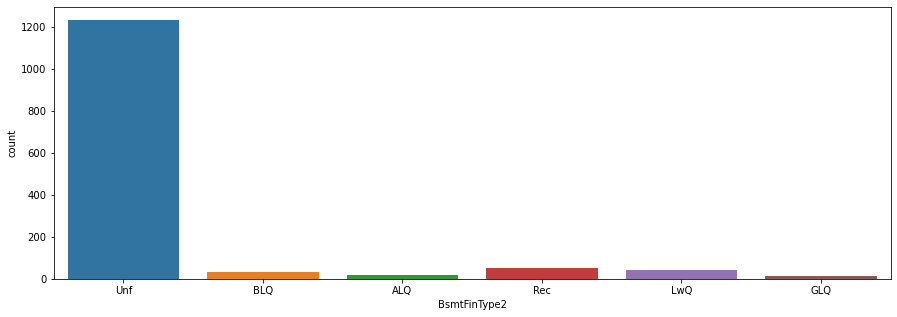

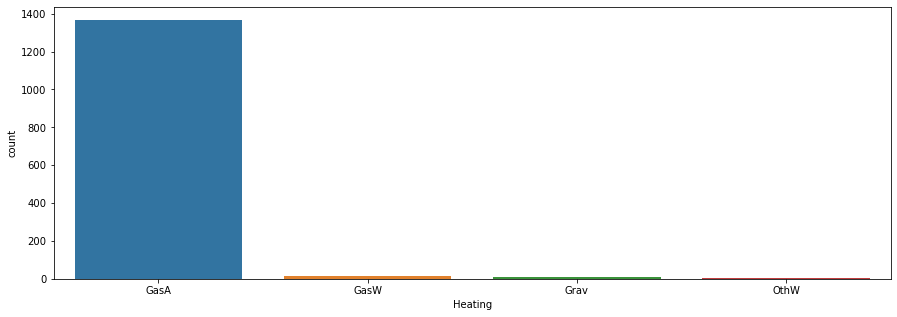

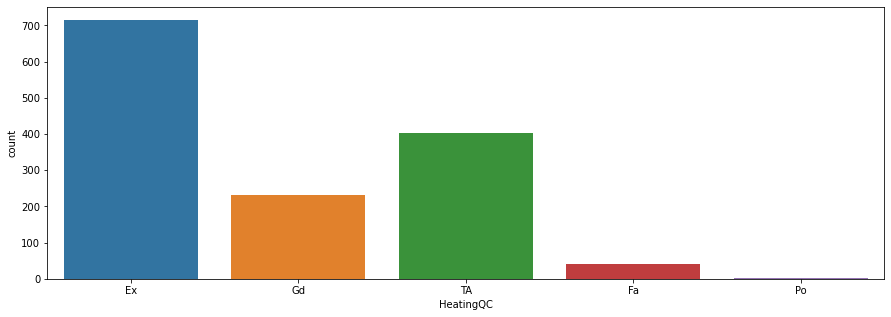

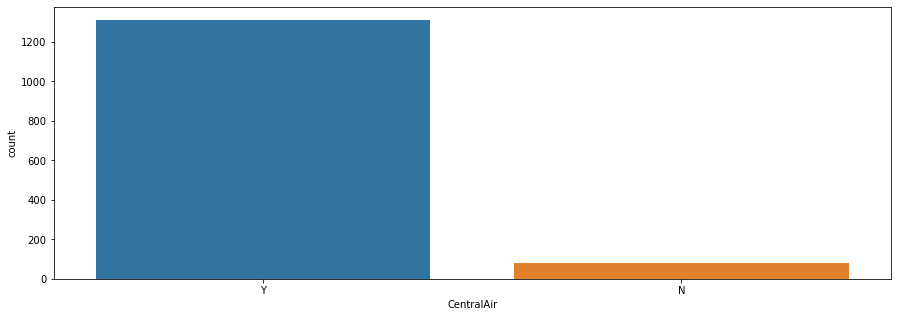

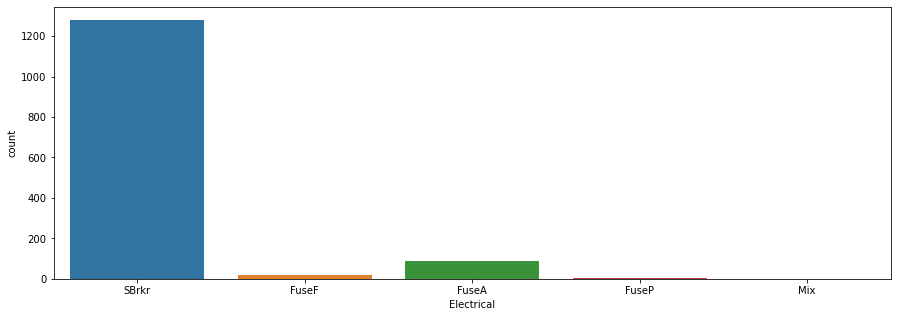

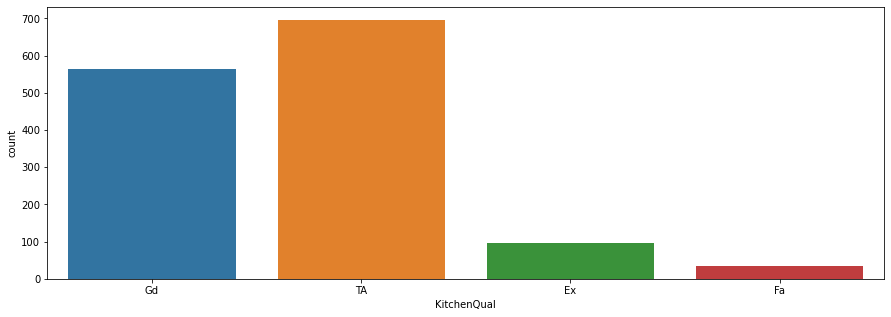

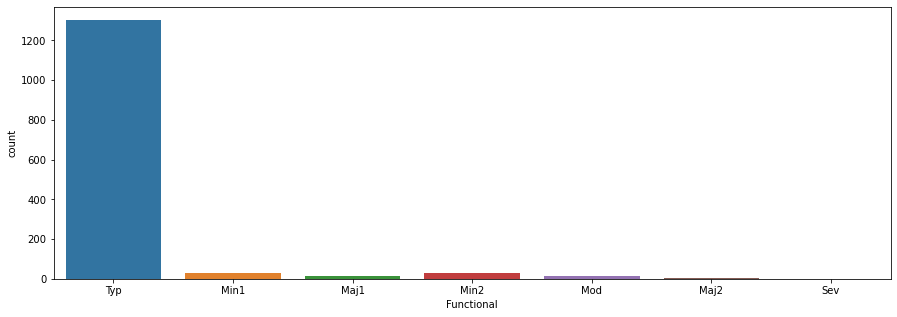

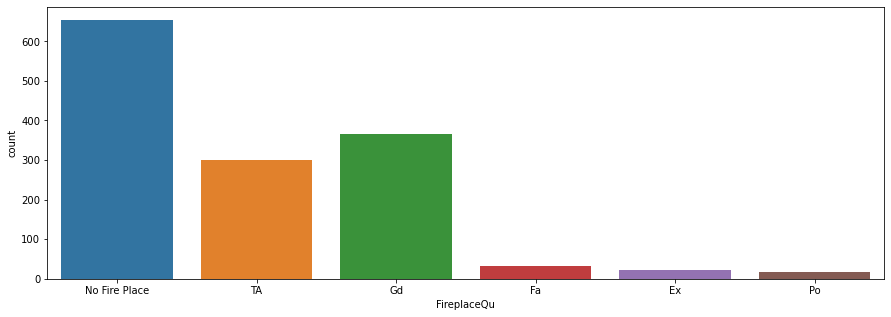

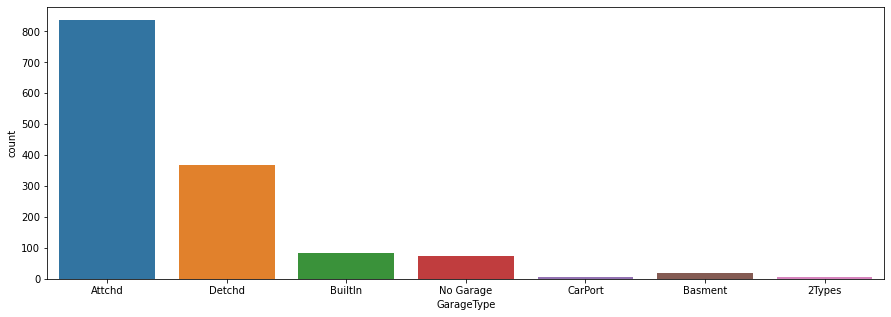

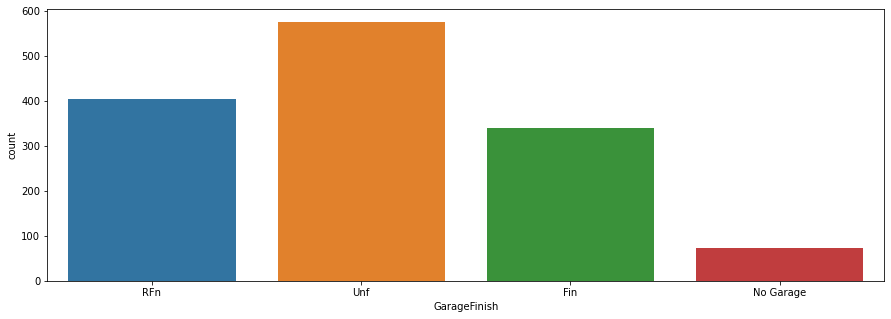

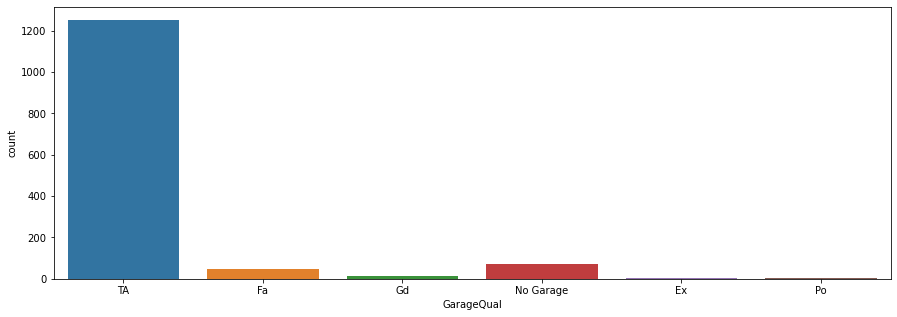

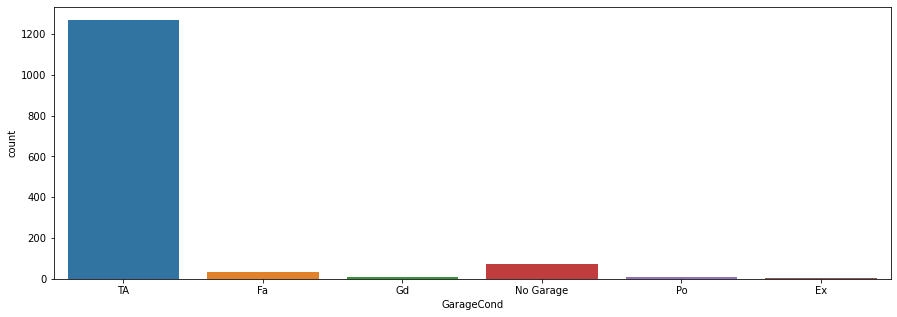

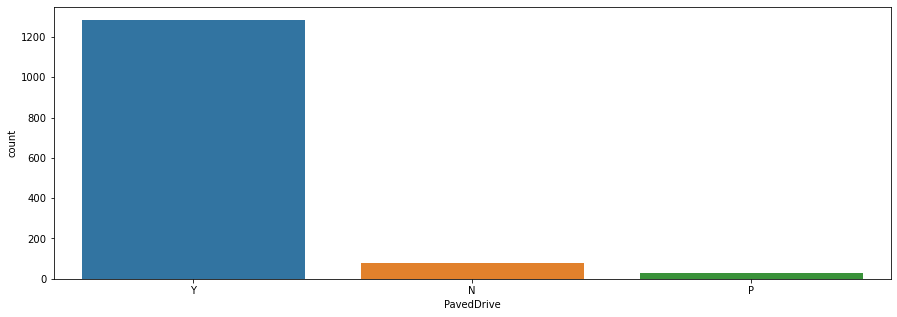

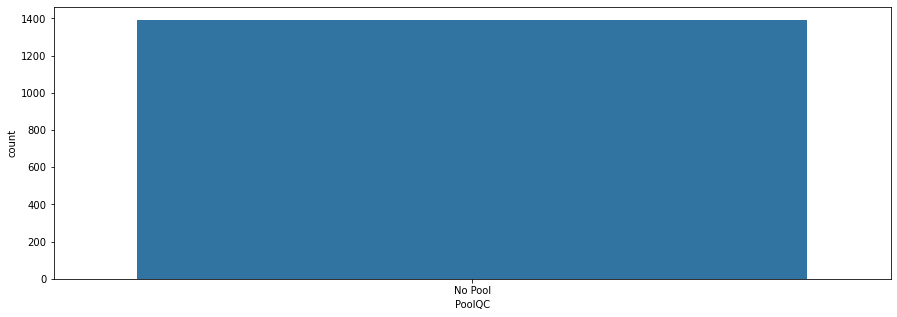

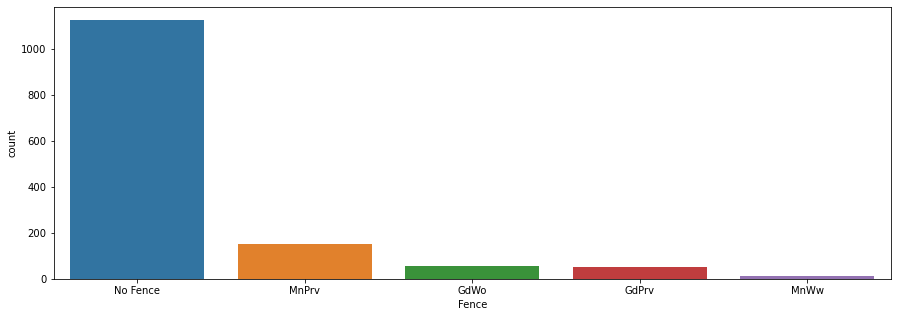

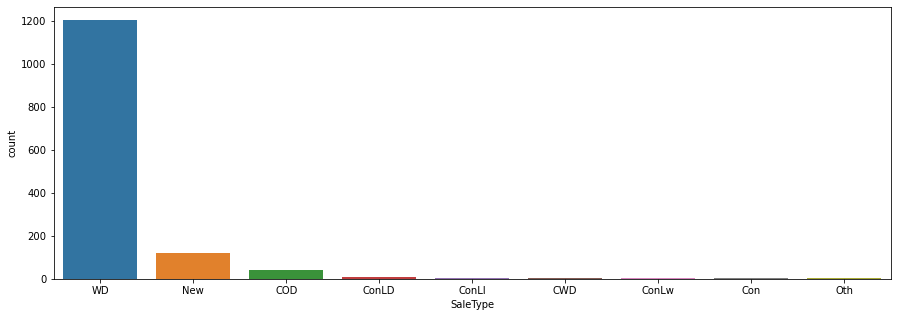

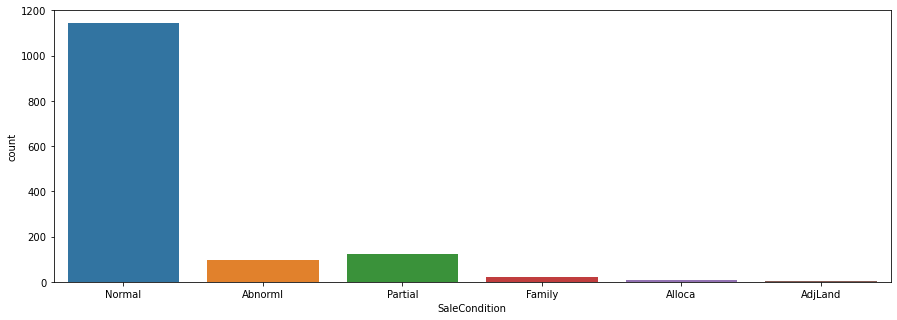

In [47]:
# count plots:
for i in house_categoricals:
    plt.figure(figsize=(15,5))
    sns.countplot(house[i])
    plt.show()
    

In [48]:
house_numericals.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [49]:
house_categoricals.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

##### 3.2 Bi-Variate Analysis:

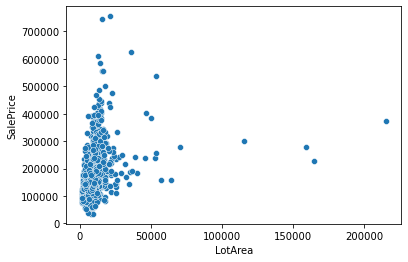

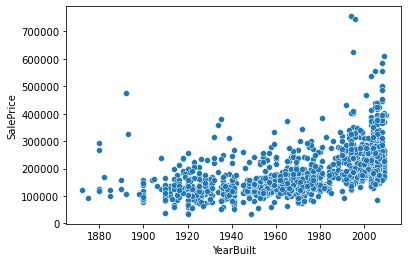

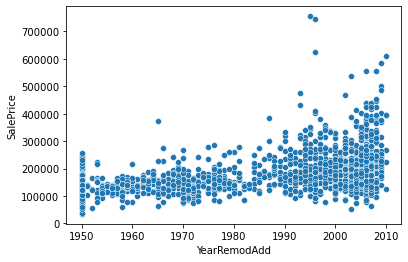

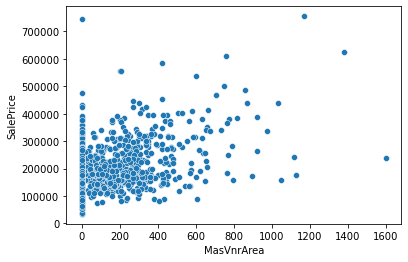

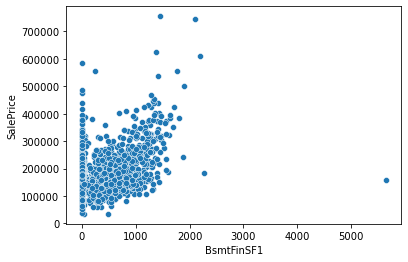

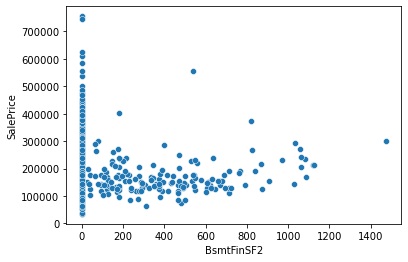

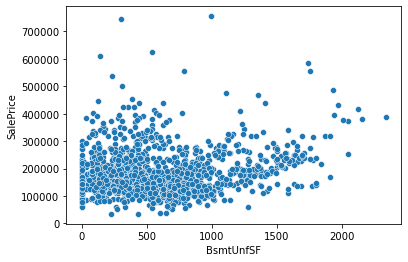

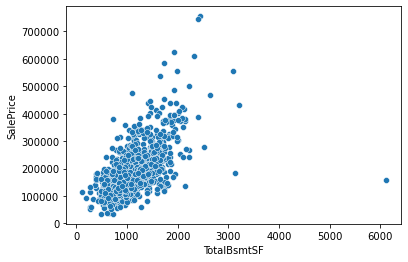

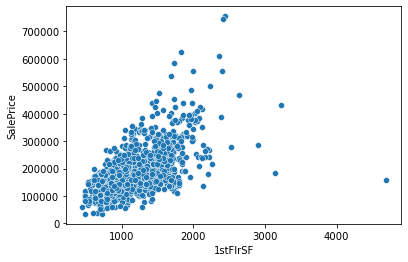

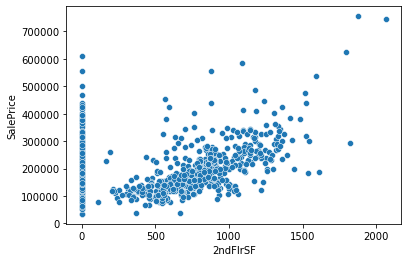

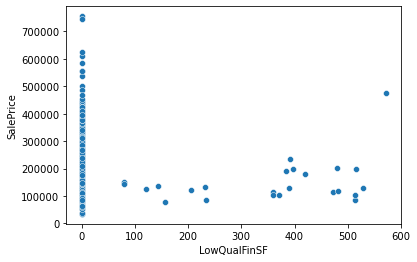

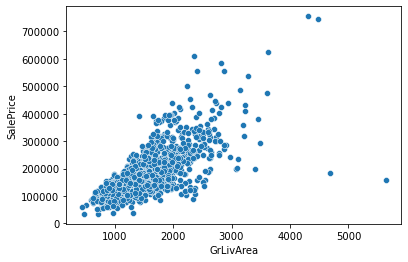

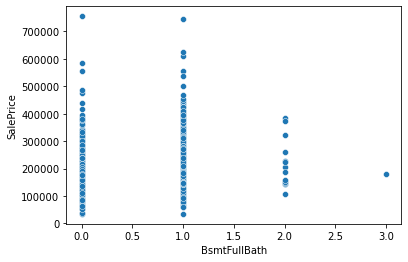

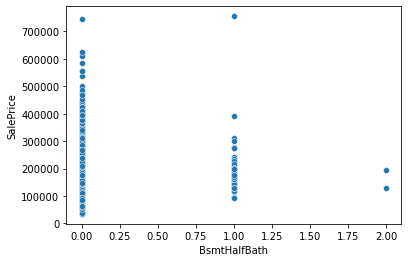

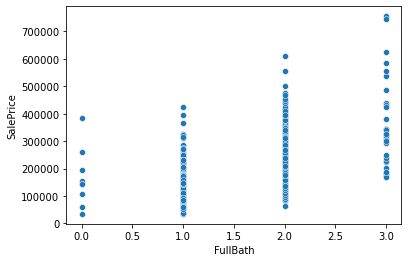

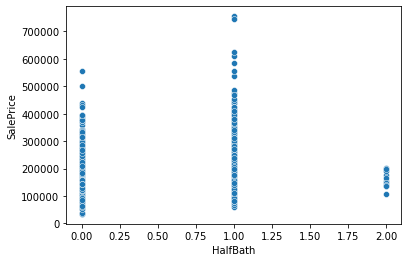

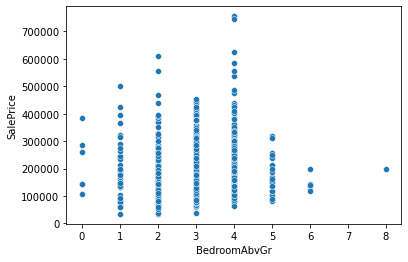

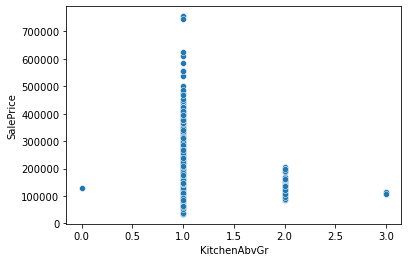

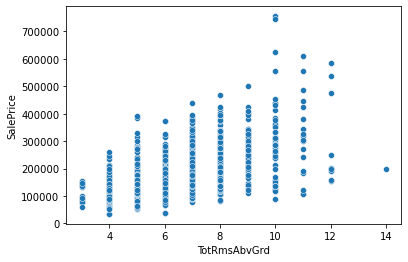

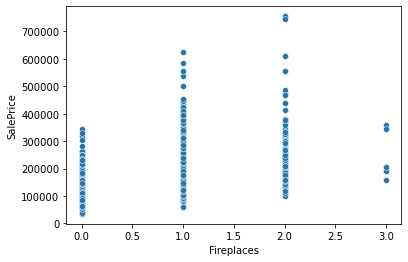

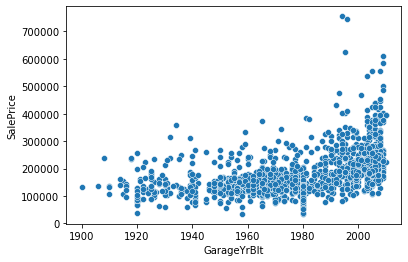

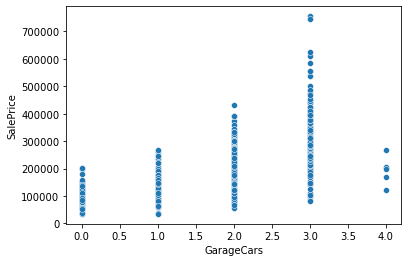

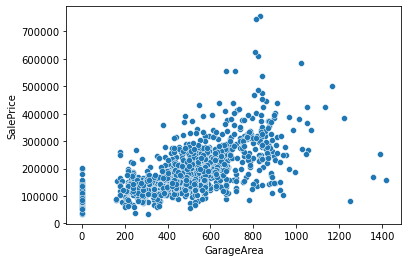

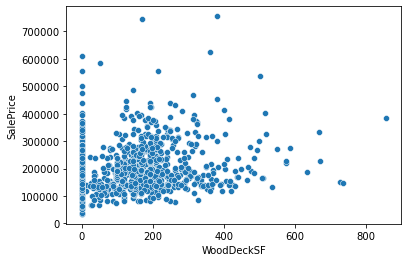

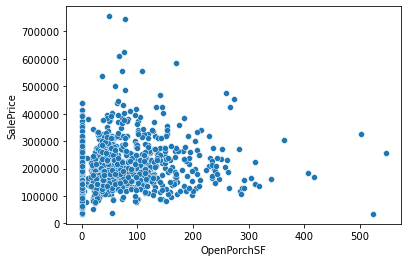

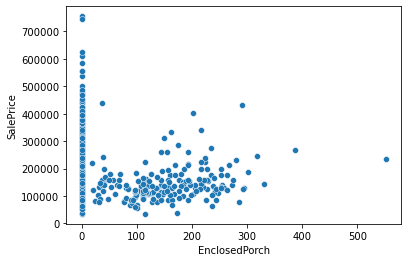

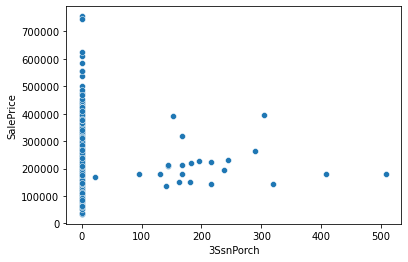

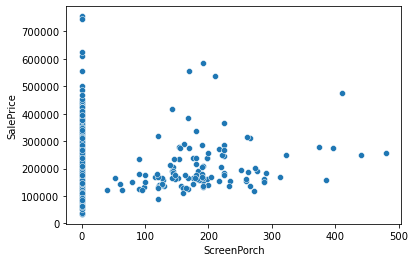

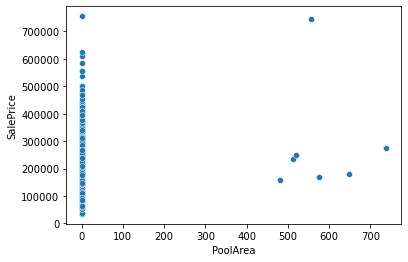

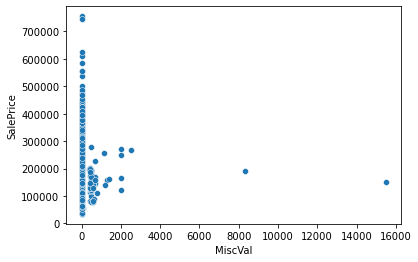

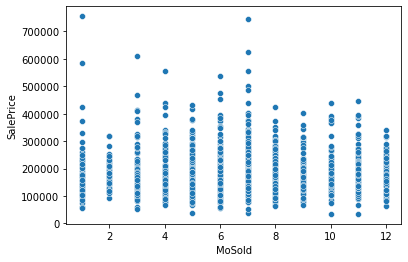

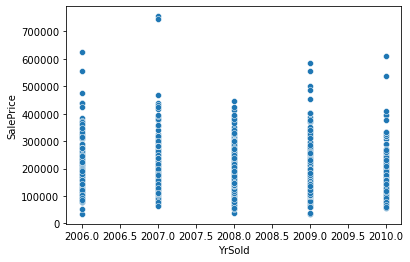

In [50]:
# Scatter plots between SalePrice and all Numerical features:
for i in house_numericals.columns[2:-1]:
    
    sns.scatterplot(y=house_numericals["SalePrice"], x=house_numericals[i], data=house)
    plt.show()

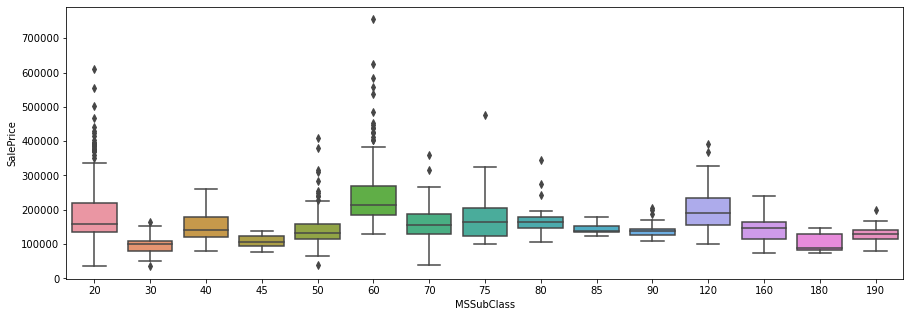

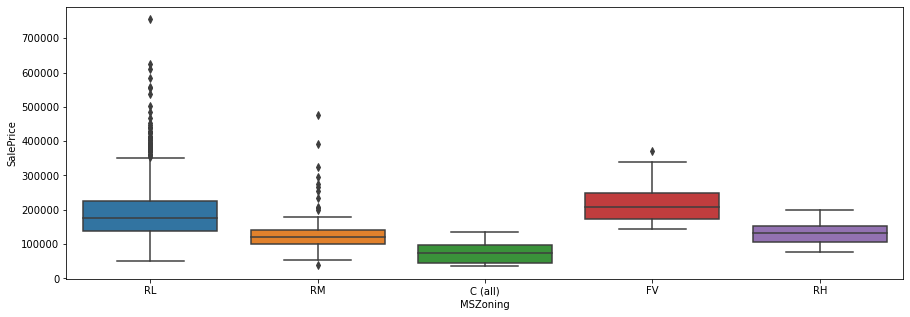

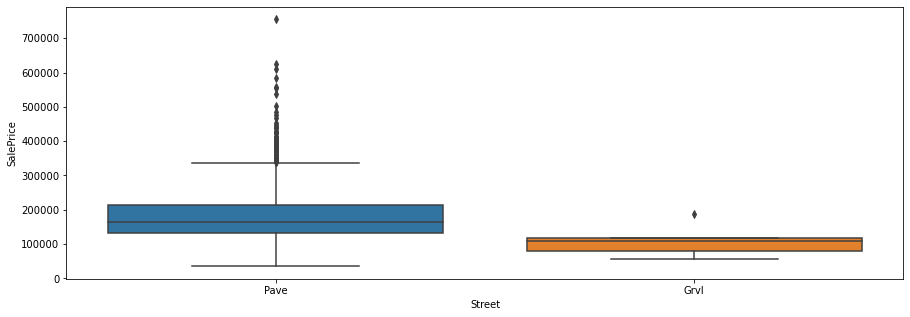

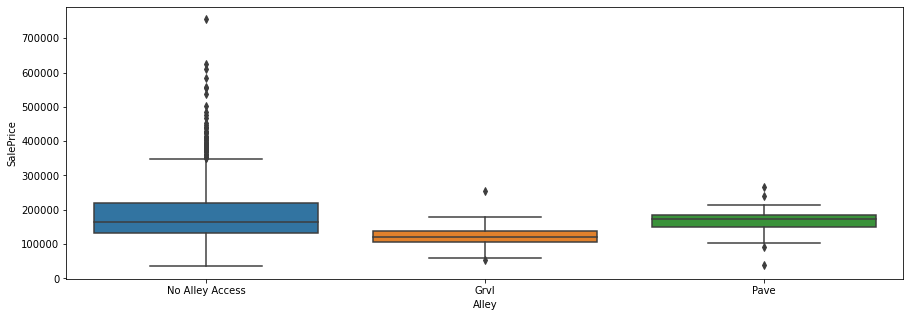

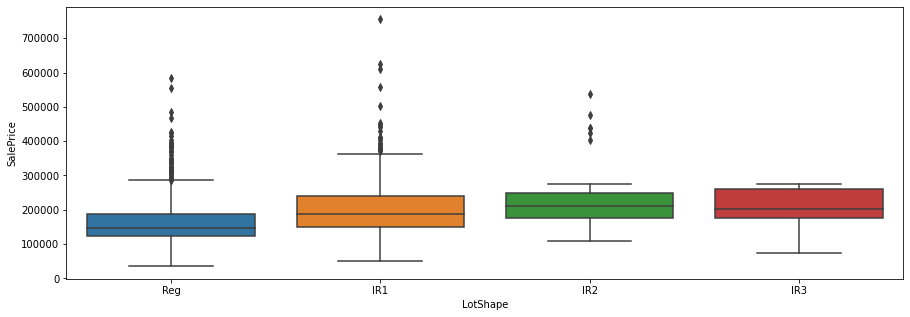

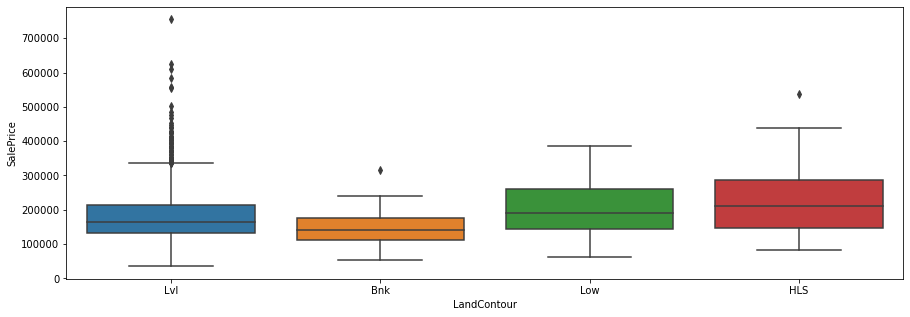

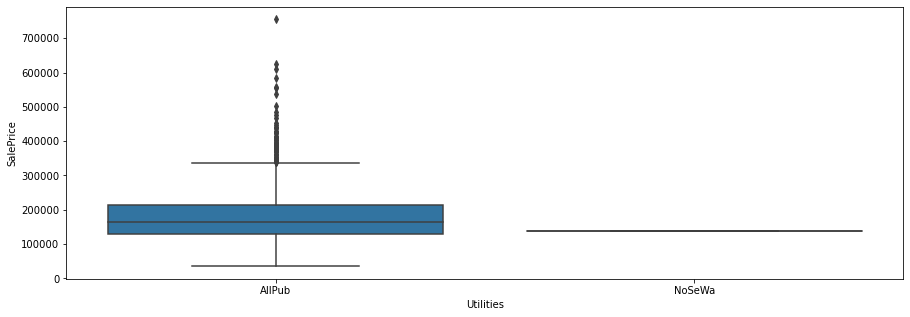

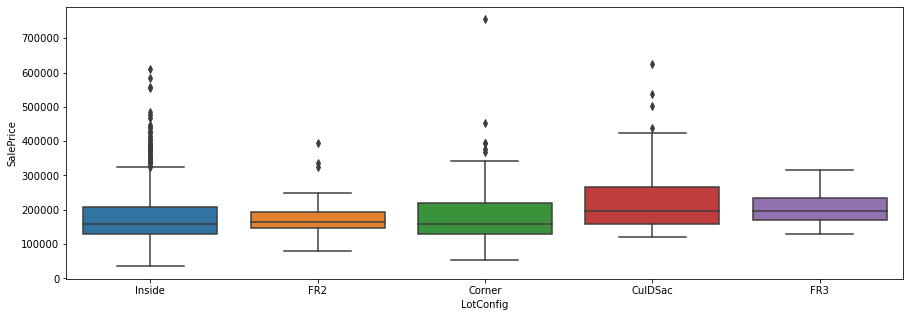

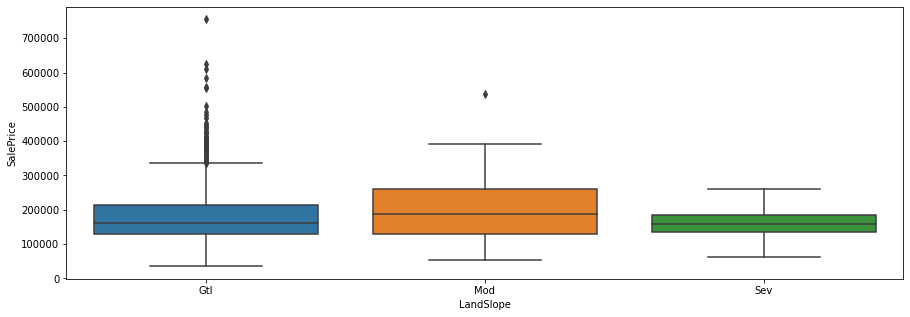

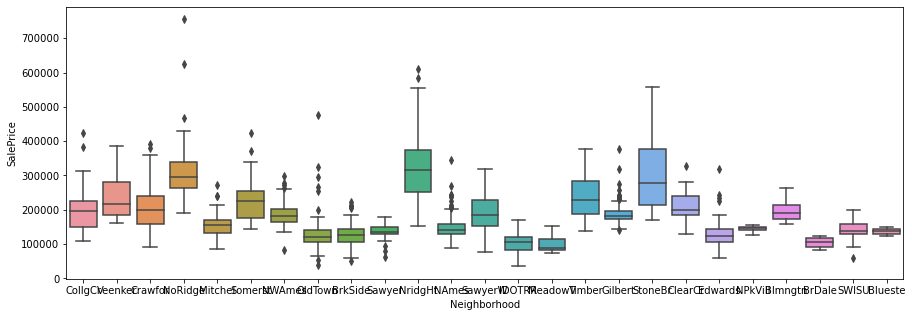

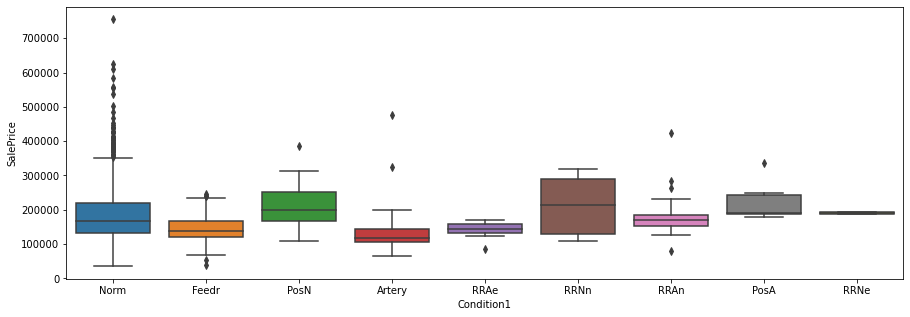

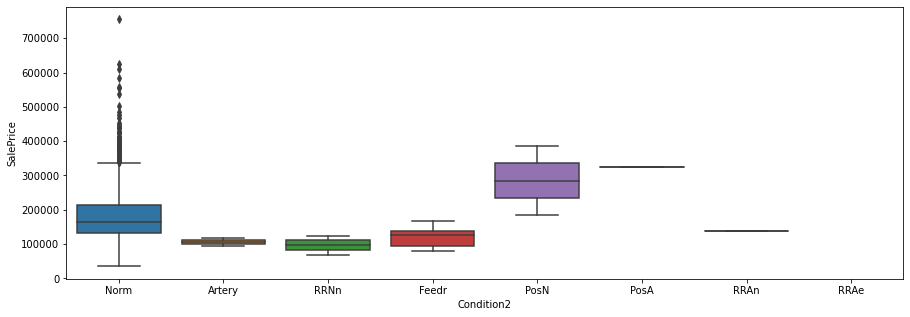

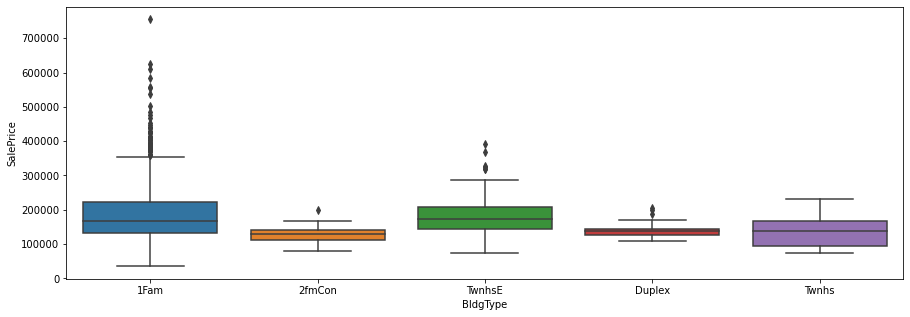

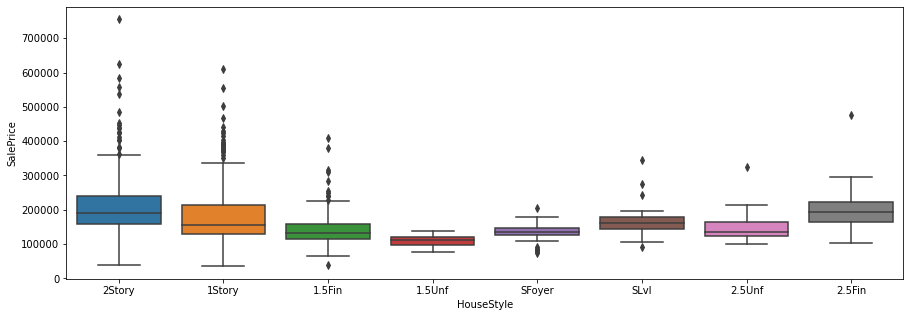

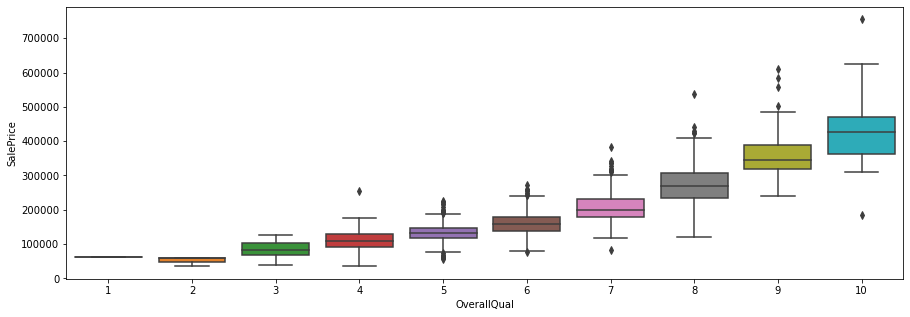

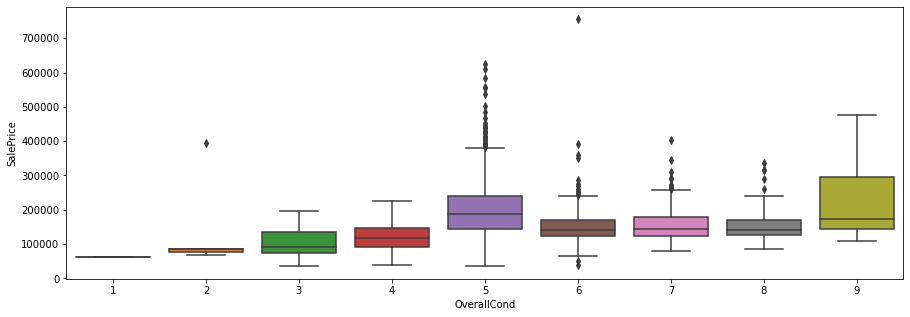

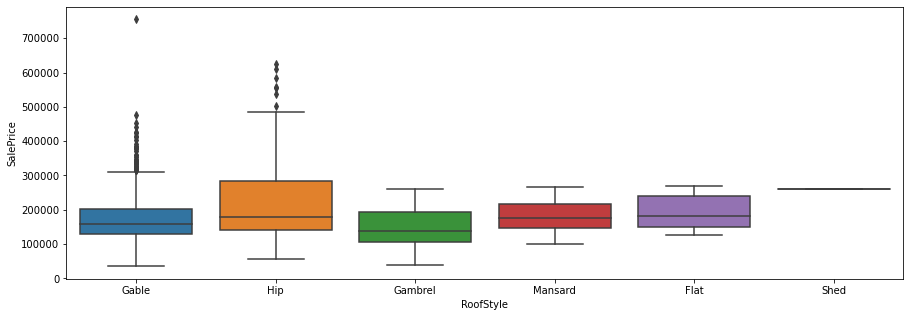

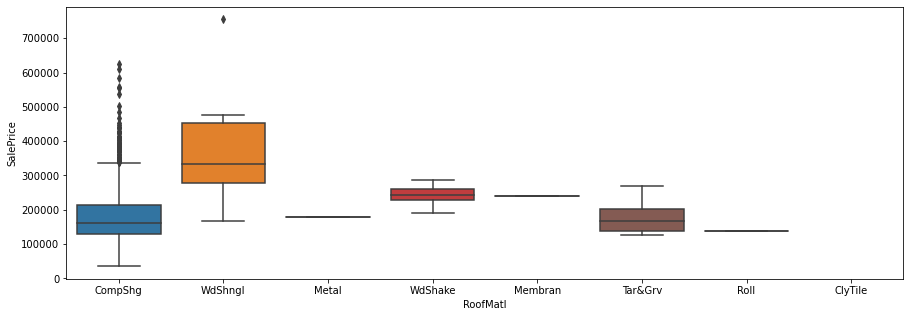

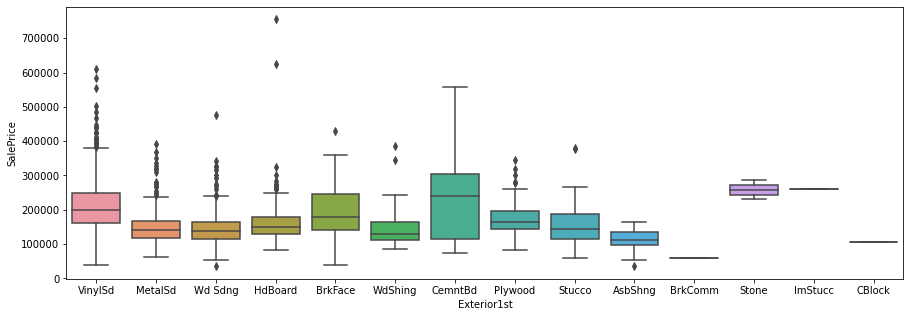

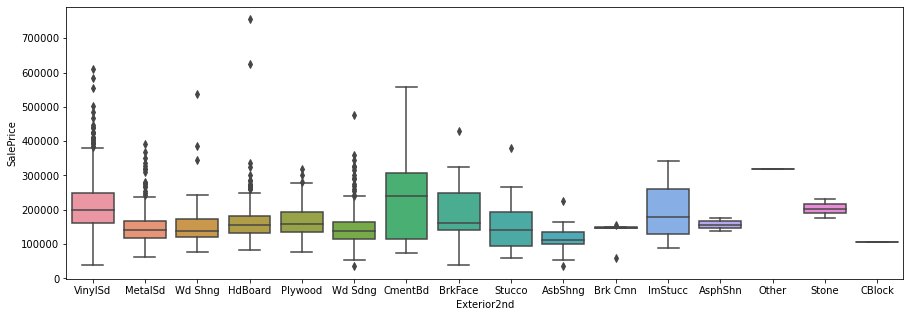

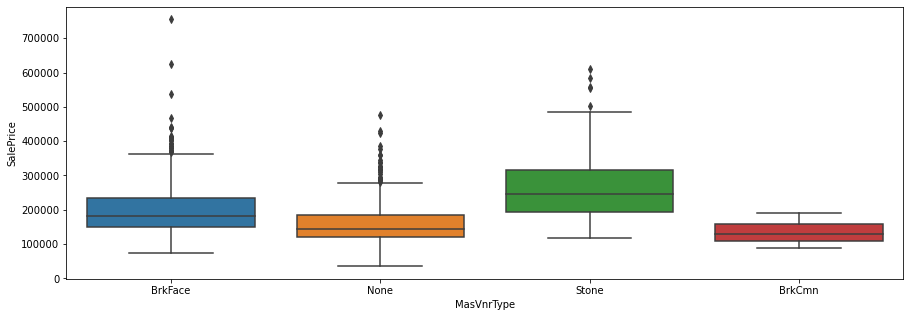

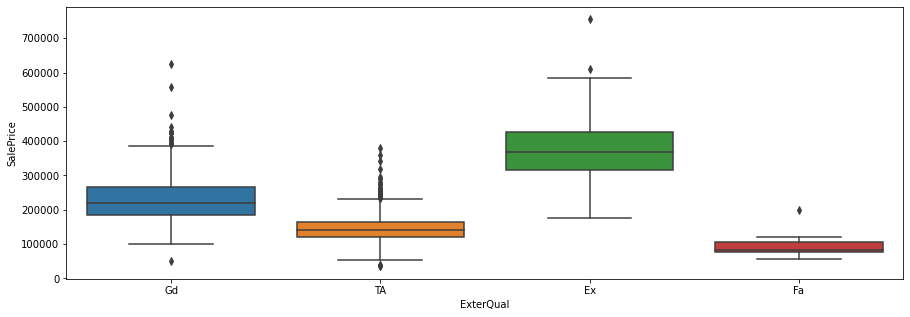

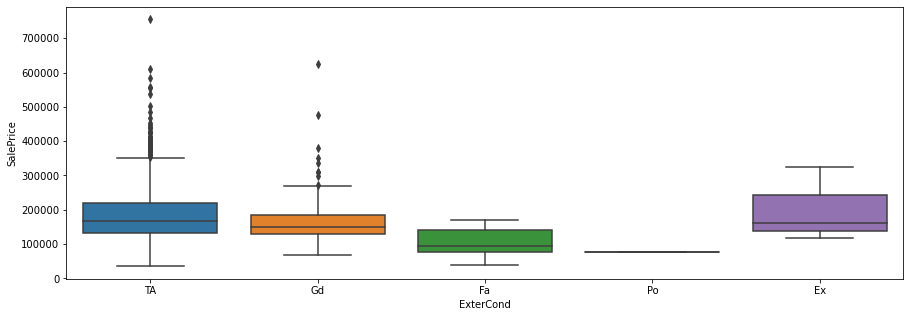

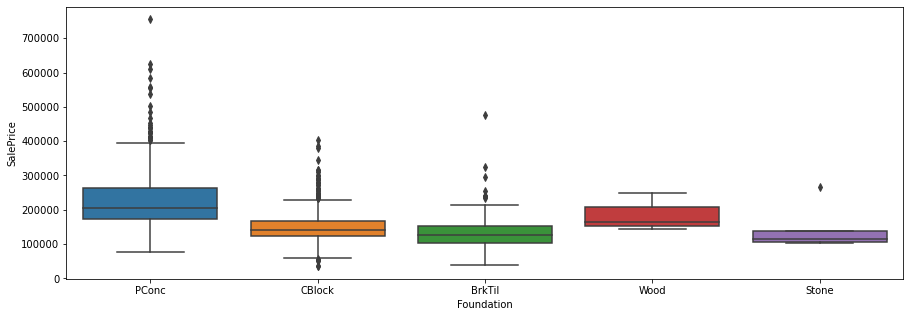

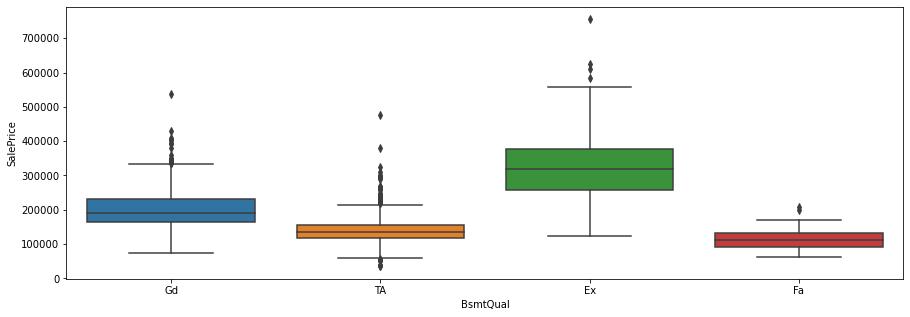

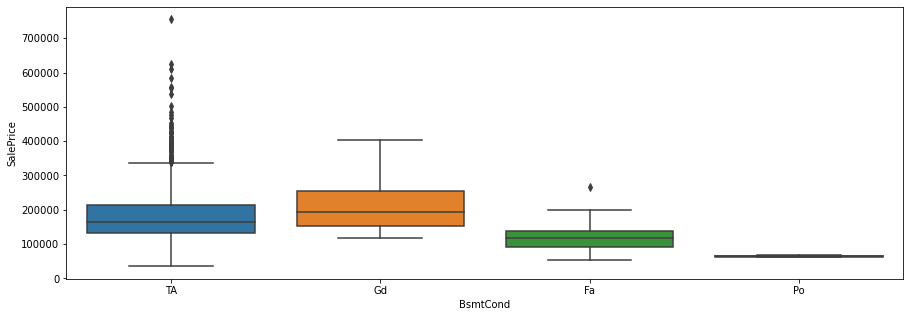

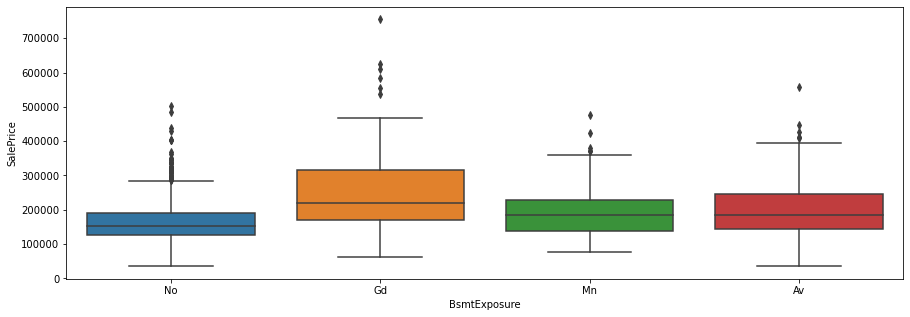

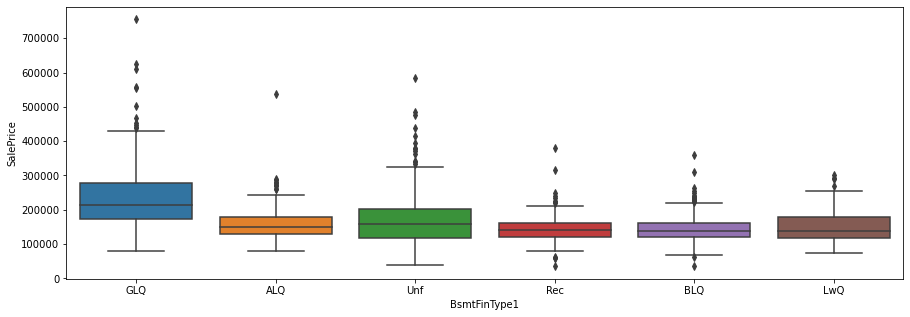

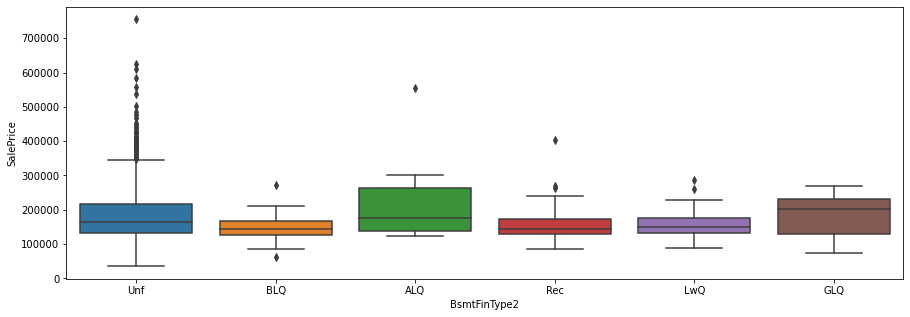

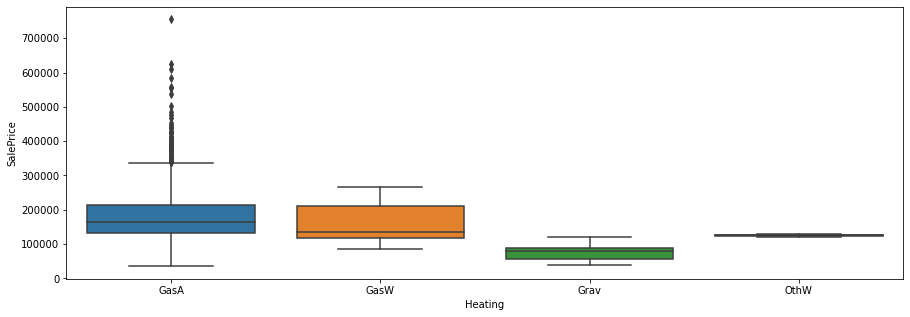

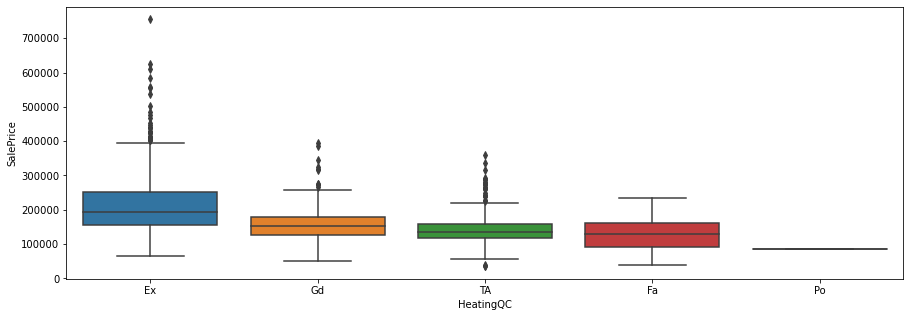

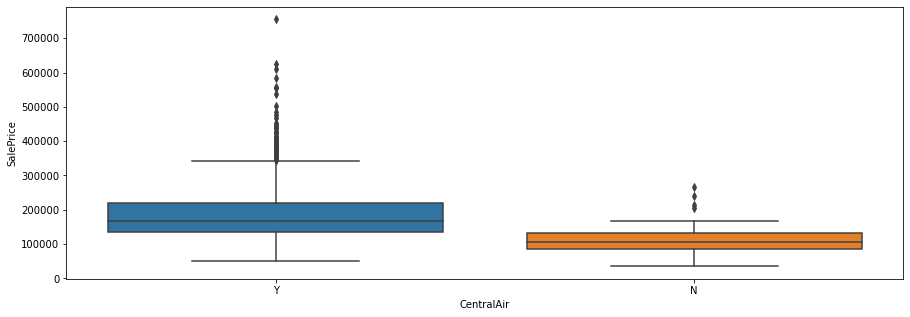

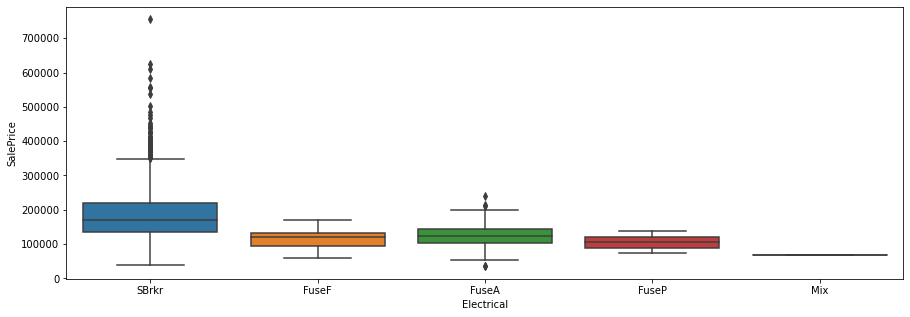

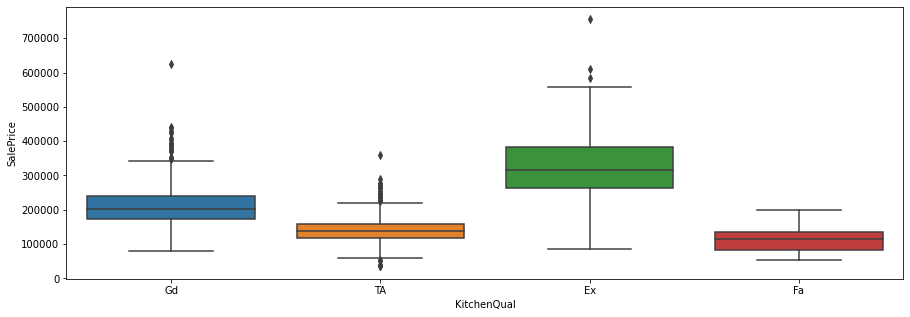

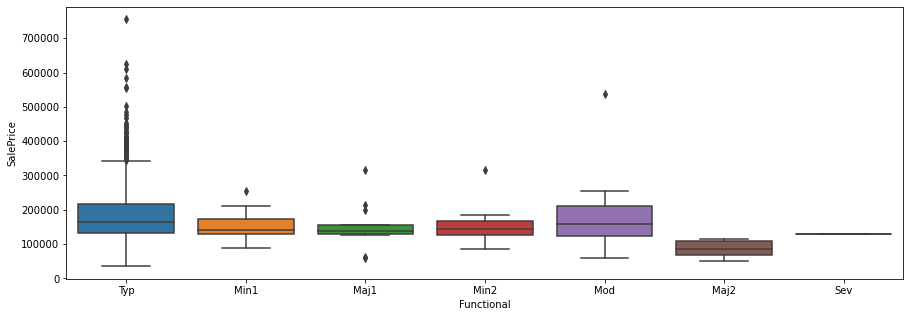

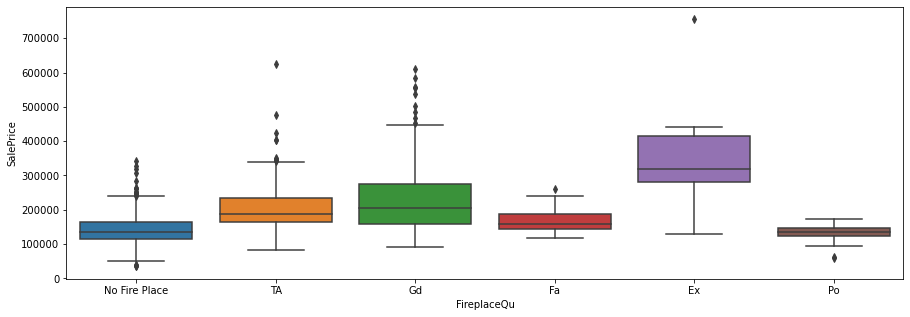

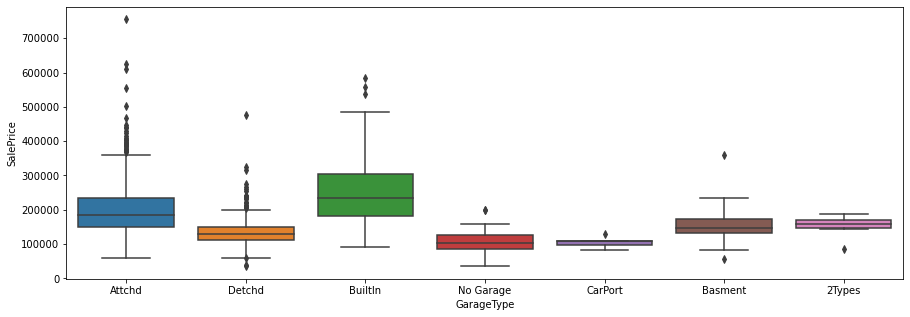

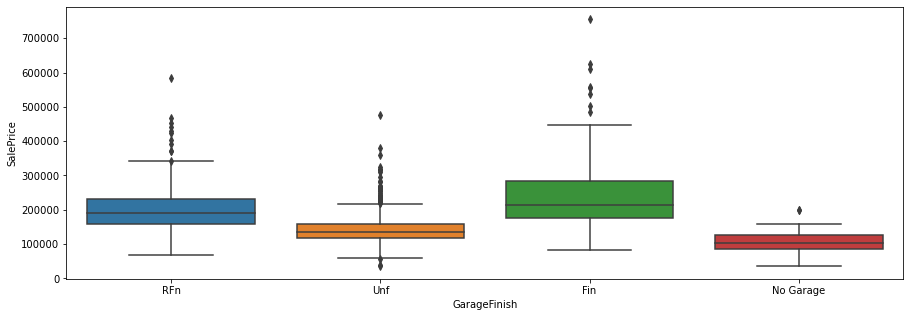

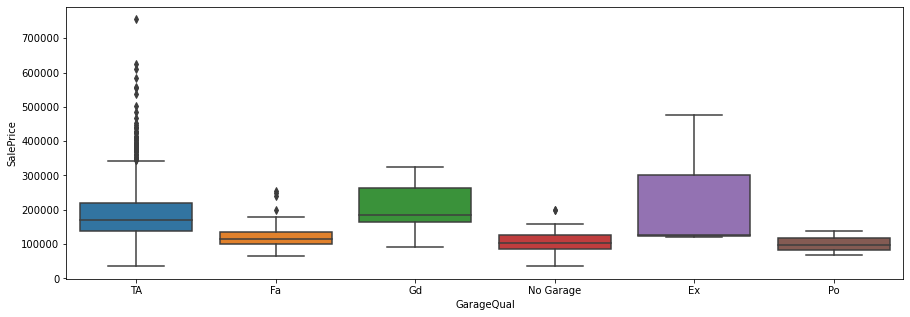

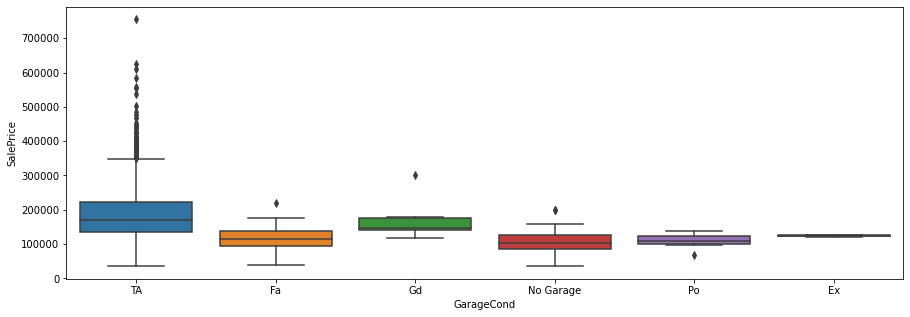

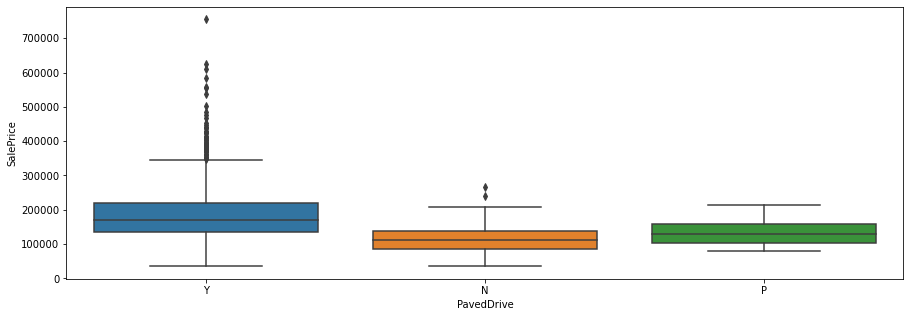

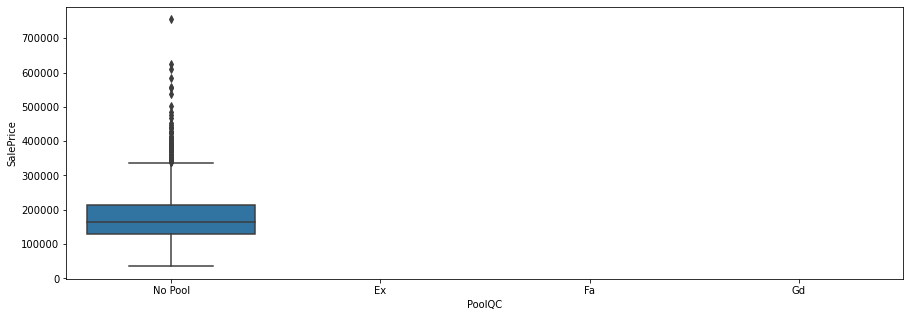

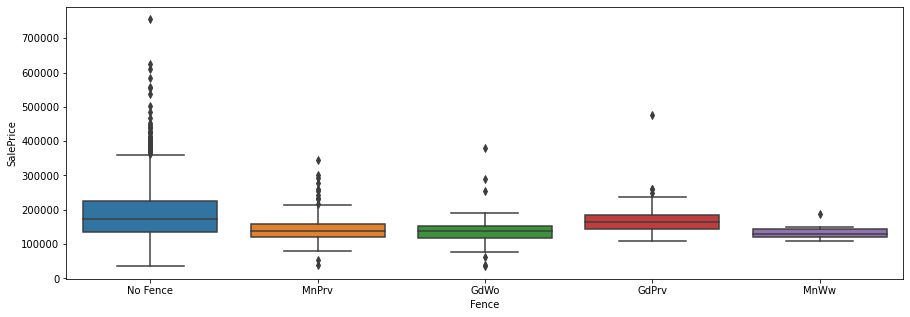

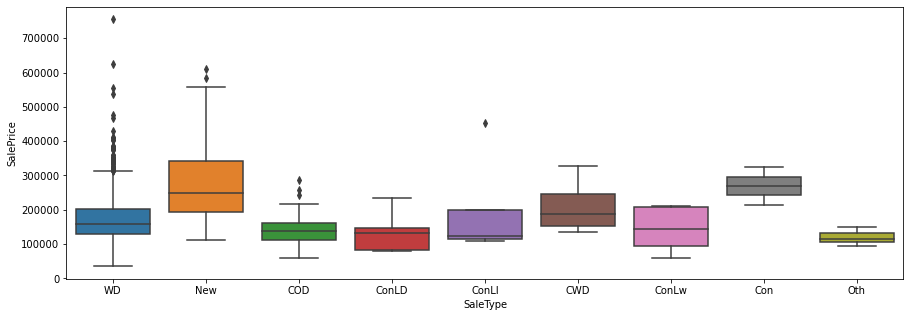

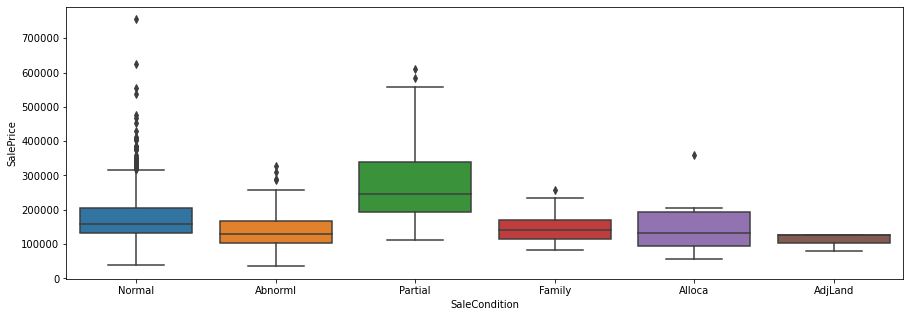

In [51]:
# Boxplots:

for i in house_categoricals:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=house_categoricals[i], y=house["SalePrice"], data=house)
    plt.show()

##### 3.3 Multi-variate Analysis:

<AxesSubplot:>

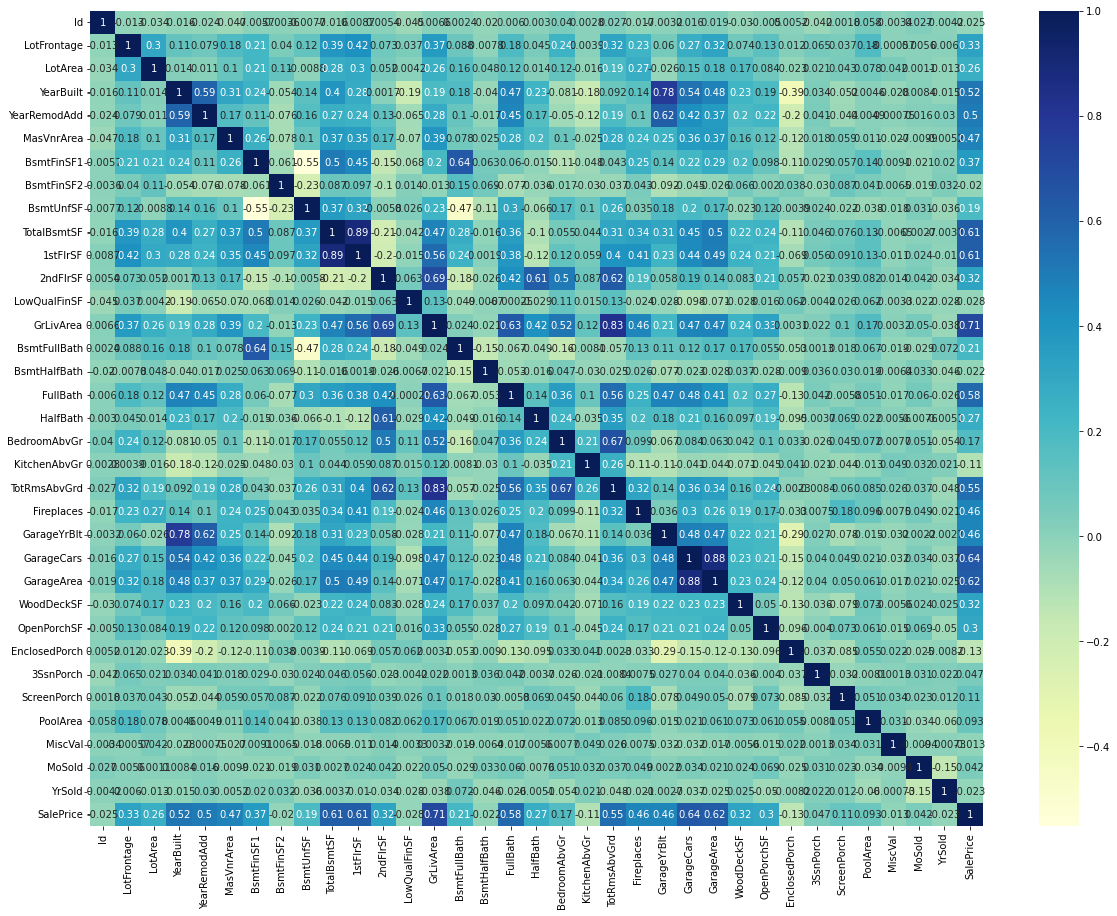

In [52]:
plt.figure(figsize=(20,15))
sns.heatmap(house_numericals.corr(), annot = True, cmap = "YlGnBu")

### 4. Data preparation for Model Building:

#### 4.1 Dummy Features:

In [53]:
house_dummies=pd.get_dummies(house[house_categoricals.columns], drop_first=True)
house_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_No Alley Access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0                      1           0             0             0   
1                      1           0             0             0   
2                      1           0             0             0   
3                      1           0             0             0   
4                      1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \

In [54]:
house_dummies.shape

(1392, 236)

In [55]:
house_dummies.corr()

MSSubClass_30  MSSubClass_40  MSSubClass_45  \
MSSubClass_30                   1.000000  -1.225970e-02      -0.021296   
MSSubClass_40                  -0.012260   1.000000e+00      -0.005006   
MSSubClass_45                  -0.021296  -5.005948e-03       1.000000   
MSSubClass_50                  -0.076064  -1.787998e-02      -0.031059   
MSSubClass_60                  -0.117408  -2.759867e-02      -0.047941   
MSSubClass_70                  -0.048046  -1.129396e-02      -0.019618   
MSSubClass_75                  -0.023835  -5.602914e-03      -0.009733   
MSSubClass_80                  -0.046319  -1.088807e-02      -0.018913   
MSSubClass_85                  -0.026865  -6.315050e-03      -0.010970   
MSSubClass_90                  -0.037211  -8.746950e-03      -0.015194   
MSSubClass_120                 -0.058603  -1.377568e-02      -0.023929   
MSSubClass_160                 -0.049722  -1.168808e-02      -0.020303   
MSSubClass_180                 -0.019426  -4.566477e-03      -0.007932   
MSSubClass_190                 -0.032119  -7.550067e-03      -0.013115   
MSZoning_FV                    -0.049308  -1.159058e-02      -0.020134   
MSZoning_RH                     0.008222  -5.602914e-03       0.065533   
MSZoning_RL                    -0.169475  -3.700298e-02      -0.102029   
MSZoning_RM                     0.205472   5.153506e-02       0.111064   
Street_Pave                    -0.041612   3.223161e-03       0.005599   
Alley_No Alley Access          -0.102663  -4.082891e-02      -0.007393   
Alley_Pave                     -0.019470   7.109968e-02      -0.016040   
LotShape_IR2                   -0.037738  -8.870875e-03      -0.015409   
LotShape_IR3                    0.026422  -4.081429e-03      -0.007090   
LotShape_Reg                    0.092740   4.113761e-02       0.055363   
LandContour_HLS                -0.006880  -1.014510e-02       0.024965   
LandContour_Low                 0.010393   8.284849e-02      -0.014074   
LandContour_Lvl                -0.067451  -2.688429e-02      -0.046700   
Utilities_NoSeWa               -0.006123  -1.439368e-03      -0.002500   
LotConfig_CulDSac              -0.058966  -1.386084e-02      -0.024077   
LotConfig_FR2                  -0.023703  -9.924112e-03      -0.017239   
LotConfig_FR3                  -0.012260  -2.881844e-03      -0.005006   
LotConfig_Inside                0.038291   3.357077e-03       0.005831   
LandSlope_Mod                  -0.001956  -1.168808e-02       0.017080   
LandSlope_Sev                   0.064168   1.631183e-01      -0.007522   
Neighborhood_Blueste           -0.008663  -2.036305e-03      -0.003537   
Neighborhood_BrDale            -0.024626  -5.788767e-03      -0.010055   
Neighborhood_BrkSide            0.225517   5.800372e-02       0.140646   
Neighborhood_ClearCr           -0.030884   9.379583e-02      -0.012611   
Neighborhood_CollgCr           -0.078473  -1.844630e-02      -0.032042   
Neighborhood_Crawfor            0.028217  -1.025405e-02       0.024355   
Neighborhood_Edwards            0.106363  -1.377568e-02      -0.023929   
Neighborhood_Gilbert           -0.054881  -1.290072e-02      -0.022409   
Neighborhood_IDOTRR             0.192165  -8.746950e-03       0.082723   
Neighborhood_MeadowV           -0.025393  -5.969093e-03      -0.010369   
Neighborhood_Mitchel           -0.042218  -9.924112e-03      -0.017239   
Neighborhood_NAmes             -0.096260   1.486949e-02       0.004118   
Neighborhood_NPkVill           -0.018423  -4.330574e-03      -0.007522   
Neighborhood_NWAmes            -0.052945  -1.244552e-02      -0.021619   
Neighborhood_NoRidge           -0.039281  -9.233724e-03      -0.016040   
Neighborhood_NridgHt           -0.054498  -1.281070e-02      -0.022253   
Neighborhood_OldTown            0.201570   3.374019e-02       0.029923   
Neighborhood_SWISU              0.018960  -7.259739e-03      -0.012611   
Neighborhood_Sawyer            -0.022857  -1.244552e-02      -0.021619   
Neighborhood_SawyerW           

<AxesSubplot:>

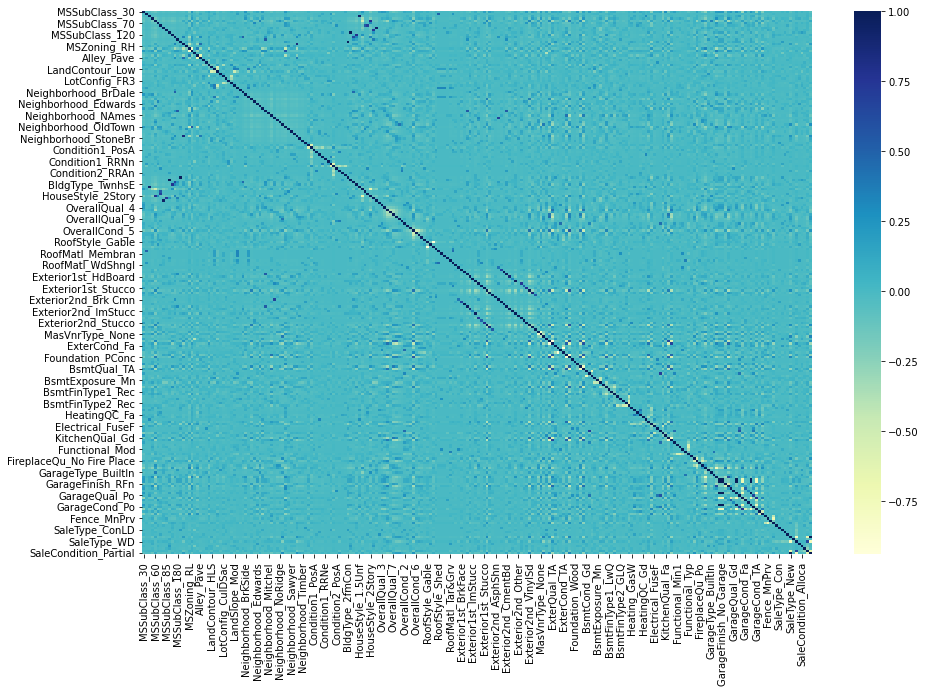

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(house_dummies.corr(), cmap= "YlGnBu")

In [57]:
house = house.drop(house_categoricals.columns, axis=1)

In [58]:
house.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000

In [59]:
house = pd.concat([house, house_dummies], axis=1)
house.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSSubClass_30  MSSubClass_40  \
0         0        0       2    2008     208500              0              0   
1         0        0       5    2007     181500              0              0   
2         0        0       9    2008     223500              0              0   
3         0        0       2    2006     140000              0              0   
4         0        0      12    2008     250000              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3            

In [60]:
house.shape

(1392, 271)

#### 4.2 Spliiting train and test data:

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x = house.drop(["Id", "SalePrice"], axis = 1)
y = house["SalePrice"]

In [63]:
print(x.shape)
print(y.shape)

(1392, 269)
(1392,)


In [64]:
x.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  MSSubClass_30  MSSubClass_40  \
0         0        0       2    2008              0              0   
1         0        0       5    2007              0              0   
2         0        0       9    2008              0              0   
3         0        0       2    2006              0              0   
4         0        0      12    2008              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4               0       

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, train_size=0.7, test_size=0.3)

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(974, 269)
(418, 269)
(974,)
(418,)


#### 4.3 Feature Scaling:

In [67]:
# Standard Scaler:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [69]:
cols = x_train.columns
cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=269)

In [70]:
house_numericals.drop(["Id", "SalePrice"], axis=1, inplace=True)
x_train[house_numericals.columns] = scaler.fit_transform(x_train[house_numericals.columns])

In [71]:
x_train.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
636     -0.888611 -0.704677  -1.145605     -1.700594   -0.565349   -1.016535   
1056    -1.288892 -0.528655   1.099111      0.971533    0.768280    0.509657   
922     -0.188120  0.072881   1.099111      1.020117   -0.565349   -0.951689   
343     -0.288190 -0.189264   1.099111      0.971533    2.857634   -0.951689   
826     -0.938646 -0.702788  -1.535990     -1.700594   -0.565349    0.799148   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
636    -0.265461  -0.747622    -2.098226 -0.935682  -0.81998     -0.126307   
1056   -0.265461   0.274503     0.778867  0.589407  -0.81998     -0.126307   
922    -0.265461   1.625746     0.653321  0.459612  -0.81998     -0.126307   
343    -0.265461   2.478675     1.615839  1.454706  -0.81998     -0.126307   
826    -0.265461  -1.359506    -0.738146 -0.978947  -0.81998     -0.126307   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
636   -1.389700     -0.820272     -0.245236 -1.024684 -0.768503     -2.248292   
1056  -0.280399      1.133139     -0.245236  0.780094 -0.768503     -1.032392   
922   -0.374807     -0.820272     -0.245236  0.780094 -0.768503      0.183509   
343    0.348992     -0.820272     -0.245236  0.780094 -0.768503     -1.032392   
826   -1.421170      1.133139     -0.245236 -1.024684 -0.768503     -1.032392   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
636      -0.183825     -1.547997    0.616389     0.050670   -2.406305   
1056     -0.183825     -0.302952    0.616389     1.084885    0.330112   
922      -0.183825     -0.302952    0.616389     1.084885    0.330112   
343      -0.183825     -0.302952    0.616389     1.084885    0.330112   
826      -0.183825     -0.925475   -0.951139     0.050670   -2.406305   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
636    -2.250820   -0.757044    -0.698173      -0.369257  -0.099596   
1056    0.076384    0.832470    -0.160666      -0.369257  -0.099596   
922    -0.341935    0.070828    -0.698173      -0.369257   0.838258   
343     0.461046    3.340922     0.376840      -0.369257  -0.099596   
826    -2.250820   -0.757044    -0.698173       1.563393  -0.099596   

      ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  MSSubClass_30  \
636     -0.278676       0.0 -0.161062 -1.932194  0.887319              1   
1056    -0.278676       0.0 -0.161062 -0.126440 -1.369205              0   
922     -0.278676       0.0 -0.161062  1.318163 -1.369205              0   
343     -0.278676       0.0 -0.161062  0.234711  0.135144              0   
826     -0.278676       0.0 -0.161062 -0.487591  0.135144              0   

      MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
636               0              0              0              0   
1056              0              0              0              0   
922               0              0              0              0   
343               0              0              0              0   
826               0              1              0              0   

      MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
636               0              0              0              0   
1056              0              0              0              0   
922               0              0              0              0   
343               0              0              0              0   
826               0              0              0              0   

      MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
636               0               0               0               0   
1056              0               1               0               0   
922               0               0               0               0   
343               0               1               0               0   
826               0               0               0               0   

 

In [72]:
x_train.describe()

LotFrontage       LotArea     YearBuilt  YearRemodAdd    MasVnrArea  \
count  9.740000e+02  9.740000e+02  9.740000e+02  9.740000e+02  9.740000e+02   
mean   2.137236e-16  9.896829e-17  2.846799e-15  5.151024e-16  3.305592e-16   
std    1.000514e+00  1.000514e+00  1.000514e+00  1.000514e+00  1.000514e+00   
min   -2.389663e+00 -1.615007e+00 -3.227661e+00 -1.700594e+00 -5.653492e-01   
25%   -4.382950e-01 -4.617491e-01 -5.925589e-01 -8.625178e-01 -5.653492e-01   
50%    1.202075e-02 -9.841971e-02  9.061565e-02  4.371074e-01 -5.653492e-01   
75%    4.623365e-01  2.844100e-01  9.689829e-01  9.229487e-01  3.279048e-01   
max    4.965494e+00  8.942557e+00  1.229240e+00  1.214453e+00  8.325515e+00   

         BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF      1stFlrSF  \
count  9.740000e+02  9.740000e+02  9.740000e+02  9.740000e+02  9.740000e+02   
mean  -2.703746e-16 -1.120482e-16  6.064052e-17 -1.465859e-16 -1.006496e-16   
std    1.000514e+00  1.000514e+00  1.000514e+00  1.000514e+00  1.000514e+00   
min   -1.016535e+00 -2.654608e-01 -1.359506e+00 -2.514097e+00 -1.914551e+00   
25%   -1.016535e+00 -2.654608e-01 -7.748552e-01 -7.067595e-01 -7.626222e-01   
50%   -1.272212e-01 -2.654608e-01 -1.519620e-01 -2.202692e-01 -1.853057e-01   
75%    6.127160e-01 -2.654608e-01  5.619025e-01  5.918557e-01  6.374040e-01   
max    4.217449e+00  9.344356e+00  3.630593e+00  5.580997e+00  5.629772e+00   

           2ndFlrSF  LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  9.740000e+02  9.740000e+02  9.740000e+02  9.740000e+02  9.740000e+02   
mean  -7.956218e-17 -2.562404e-16  2.052317e-16  7.260904e-17 -1.164936e-16   
std    1.000514e+00  1.000514e+00  1.000514e+00  1.000514e+00  1.000514e+00   
min   -8.199802e-01 -1.263075e-01 -2.101699e+00 -8.202720e-01 -2.452359e-01   
25%   -8.199802e-01 -1.263075e-01 -7.239228e-01 -8.202720e-01 -2.452359e-01   
50%   -8.199802e-01 -1.263075e-01 -9.649867e-02 -8.202720e-01 -2.452359e-01   
75%    8.915629e-01 -1.263075e-01  5.053564e-01  1.133139e+00 -2.452359e-01   
max    3.515620e+00  1.100986e+01  6.233798e+00  3.086549e+00  7.851704e+00   

           FullBath      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  9.740000e+02  9.740000e+02  9.740000e+02  9.740000e+02  9.740000e+02   
mean   1.664195e-16  9.369644e-17 -5.099161e-16 -2.448418e-16  2.747631e-16   
std    1.000514e+00  1.000514e+00  1.000514e+00  1.000514e+00  1.000514e+00   
min   -2.829462e+00 -7.685033e-01 -3.464193e+00 -5.022893e+00 -2.170520e+00   
25%   -1.024684e+00 -7.685033e-01 -1.032392e+00 -1.838250e-01 -9.254749e-01   
50%    7.800939e-01 -7.685033e-01  1.835086e-01 -1.838250e-01 -3.029524e-01   
75%    7.800939e-01  1.216967e+00  1.835086e-01 -1.838250e-01  3.195701e-01   
max    2.584872e+00  3.202437e+00  6.263011e+00  9.494312e+00  4.677227e+00   

         Fireplaces   GarageYrBlt    GarageCars    GarageArea    WoodDeckSF  \
count  9.740000e+02  9.740000e+02  9.740000e+02  9.740000e+02  9.740000e+02   
mean   1.384929e-16  1.002962e-15 -4.684822e-17 -2.963634e-17 -6.953142e-17   
std    1.000514e+00  1.000514e+00  1.000514e+00  1.000514e+00  1.000514e+00   
min   -9.511385e-01 -3.258817e+00 -2.406305e+00 -2.250820e+00 -7.570438e-01   
25%   -9.511385e-01 -6.525960e-01 -1.038096e+00 -6.352401e-01 -7.570438e-01   
50%    6.163893e-01  5.067016e-02  3.301119e-01  4.032236e-02 -7.570438e-01   
75%    6.163893e-01  9.194107e-01  3.301119e-01  5.187456e-01  6.337810e-01   
max    3.751445e+00  1.291728e+00  1.698320e+00  3.749906e+00  5.269863e+00   

        OpenPorchSF  EnclosedPorch     3SsnPorch   ScreenPorch  PoolArea  \
count  9.740000e+02   9.740000e+02  9.740000e+02  9.740000e+02     974.0   
mean  -2.735662e-18   7.281422e-16 -3.670347e-17 -9.666007e-17       0.0   
std    1.000514e+00   1.000514e+00  1.000514e+00  1.000514e+00       0.0   
min   -6.981729e-01  -3.692568e-01 -9.959629e-02 -2.786762e-01       0.0   
25%   -6.981729e-01  -3.692568e-01 -9.959629e-02 -2.786762e-01      

In [73]:
x_test[house_numericals.columns] = scaler.transform(x_test[house_numericals.columns])


#### 5. Model Building:

In [74]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

##### 5.1 Linear Regression:

In [75]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [76]:
from sklearn.feature_selection import RFE

In [77]:
rfe = RFE(linreg, 30)
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [78]:
x_train.columns[rfe.support_]

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSSubClass_90',
       'BldgType_Duplex', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'BsmtCond_Po', 'Electrical_Mix',
       'GarageFinish_No Garage', 'GarageQual_No Garage'],
      dtype='object')

In [79]:
features = x_train.columns[rfe.support_]

In [80]:
features

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSSubClass_90',
       'BldgType_Duplex', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'BsmtCond_Po', 'Electrical_Mix',
       'GarageFinish_No Garage', 'GarageQual_No Garage'],
      dtype='object')

##### 5.2 Statsmodels:

In [81]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
lr = sm.OLS(y_train, sm.add_constant(x_train[features]))
lr=lr.fit()

In [83]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     196.8
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:30:28   Log-Likelihood:                -11456.
No. Observations:                 974   AIC:                         2.296e+04
Df Residuals:                     948   BIC:                         2.309e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.594e+05   7809.140     20.408      0.000    1.44e+05    1.75e+05
BsmtFinSF1                1.2e+04    984.673     12.185      0.000    1.01e+04    1.39e+04
BsmtFinSF2              2985.3811   1013.235      2.946      0.003     996.938    4973.824
BsmtUnfSF               2085.8489    964.809      2.162      0.031     192.441    3979.256
TotalBsmtSF              1.71e+04   1815.806      9.419      0.000    1.35e+04    2.07e+04
1stFlrSF                3422.6218   1800.134      1.901      0.058    -110.087    6955.331
2ndFlrSF                1.378e+04   1020.841     13.494      0.000    1.18e+04    1.58e+04
LowQualFinSF           -1740.6258   1053.757     -1.652      0.099   -3808.592     327.341
GrLivArea               1.401e+04    901.285     15.547      0.000    1.22e+04    1.58e+04
MSSubClass_90          -1.252e+04   3270.802     -3.828      0.000   -1.89e+04   -6100.218
BldgType_Duplex        -1.252e+04   3270.802     -3.828      0.000   -1.89e+04   -6100.218
OverallQual_2          -2.819e+04   1.97e+04     -1.428      0.154   -6.69e+04    1.05e+04
OverallQual_3          -5.634e+04   1.19e+04     -4.720      0.000   -7.98e+04   -3.29e+04
OverallQual_4          -4.359e+04   4818.612     -9.046      0.000    -5.3e+04   -3.41e+04
OverallQual_5          -3.866e+04   3401.261    -11.366      0.000   -4.53e+04    -3.2e+04
OverallQual_6          -2.635e+04   3089.950     -8.528      0.000   -3.24e+04   -2.03e+04
OverallQual_8           3.957e+04   3766.418     10.507      0.000    3.22e+04     4.7e+04
OverallQual_9           1.137e+05   7161.752     15.871      0.000    9.96e+04    1.28e+05
OverallQual_10          1.286e+05   1.08e+04     11.925      0.000    1.07e+05     1.5e+05
OverallCond_2           1.027e+04   1.76e+04      0.583      0.560   -2.43e+04    4.49e+04
OverallCond_3           -793.1676   1.12e+04     -0.071      0.944   -2.28e+04    2.12e+04
OverallCond_4           1.225e+04   9154.580      1.338      0.181   -5717.791    3.02e+04
OverallCond_5           3.491e+04   7792.527      4.480      0.000    1.96e+04    5.02e+04
OverallCond_6             3.3e+04   7975.959      4.137      0.000    1.73e+04    4.87e+04
OverallCond_7           3.907e+04   8003.101      4.882      0.000    2.34e+04    5.48e+04
OverallCond_8           4.133e+04   8710.226      4.745      0.000    2.42e+04    5.84e+04
OverallCond_9           3.103e+04   1.13e+04      2.735      0.006    8763.785    5.33e+04
BsmtCond_Po            -3.312e+04   2.66e+04     -1.247      0.213   -8.53e+04     1.9e+04
Electrical_Mix          8575.2785   4.23e+04      0.203      0.839   -7.44e+04    9.15e+04
GarageFinish_No Garage -6847.0859   2405.604     -2.846      0.005   -1.16e+04   -2126.162
GarageQual_No Garage   -6847.0859   2405.604     -2.846      0.005   -1.16e+04  

In [84]:
from sklearn.model_selection import GridSearchCV

##### 5.3 Lasso Regression:

In [85]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params,   
                        cv = folds, 
                        scoring="neg_mean_absolute_error", 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train[features], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.101131      0.150465         0.002403        0.001032      0.0001   
1       0.019548      0.004118         0.001993        0.000629       0.001   
2       0.034347      0.023010         0.003766        0.001714        0.01   
3       0.020330      0.002783         0.002207        0.000424        0.05   
4       0.023584      0.003264         0.003102        0.001045         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -21500.116829      -18238.294729      -21201.587481   
1   {'alpha': 0.001}      -21500.107896      -18238.294262      -21201.571218   
2    {'alpha': 0.01}      -21500.018568      -18238.289593      -21201.408593   
3    {'alpha': 0.05}      -21499.621556      -18238.268841      -21200.685816   
4     {'alpha': 0.1}      -21499.013819      -18238.240293      -21199.782345   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -21148.555019      -22545.539535    -20926.818719     1435.392205   
1      -21148.530526      -22545.535661    -20926.807913     1435.389413   
2      -21148.285600      -22545.496916    -20926.699854     1435.361497   
3      -21147.197037      -22545.324714    -20926.219593     1435.237485   
4      -21145.836334      -22545.109463    -20925.596451     1435.074667   

   rank_test_score  split0_train_score  split1_train_score  \
0               26       -19531.509148       -20178.789306   
1               25       -19531.511204       -20178.792155   
2               24       -19531.531765       -20178.820644   
3               23       -19531.623146       -20178.947261   
4               22       -19531.703166       -20179.106939   

   split2_train_score  split3_train_score  split4_train_score  \
0       -19652.618478       -19730.028234       -19340.301830   
1       -19652.619080       -19730.028659       -19340.306182   
2       -19652.625103       -19730.032908       -19340.349696   
3       -19652.651870       -19730.051790       -19340.543523   
4       -19652.685329       -19730.075393       -19340.786452   

   mean_train_score  std_train_score  
0     -19686.649399       279.022096  
1     -19686.651456       279.021791  
2     -19686.672023       279.018737  
3     -19686.763518       279.005067  
4     -19686.871456       278.992140

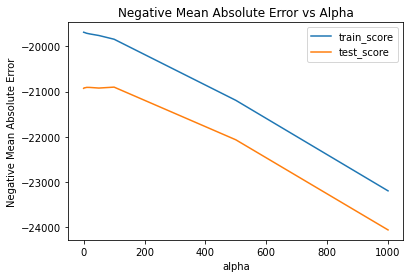

In [89]:
# Plotting mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype("float")

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Negative Mean Absolute Error vs Alpha")
plt.legend(['train_score', 'test_score'], loc='best')
plt.show()

In [90]:
alp=model_cv.best_params_
Alpha=alp["alpha"]
Alpha

100

In [91]:
lasso = Lasso(alpha = Alpha)
lasso.fit(x_train[features], y_train)

Lasso(alpha=100)

In [92]:
y_train_pred = lasso.predict(x_train[features])

In [93]:
from sklearn.metrics import r2_score, mean_squared_error

In [94]:
r2_score(y_train, y_train_pred)

0.8362852379909441

In [95]:
rss = np.sum(np.square(y_train-y_train_pred))
print(rss)

mse = mean_squared_error(y_train, y_train_pred)
print(mse)

rmse = mse**0.5
print(rmse)

951522752048.091
976922743.3758634
31255.763362552247


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

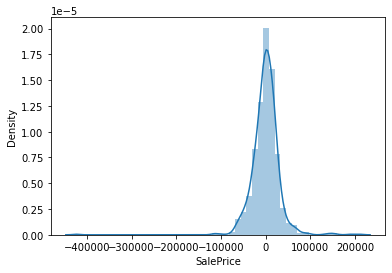

In [96]:
residuals = y_train - y_train_pred
sns.distplot(residuals)

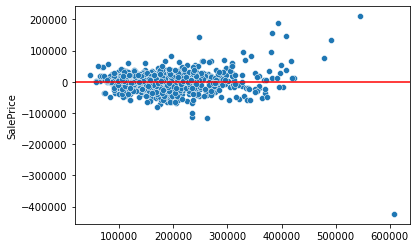

In [97]:
sns.scatterplot( y_train_pred, residuals)
plt.axhline(y = 0, c = "r")

In [98]:
y_test_pred = lasso.predict(x_test[features])

In [99]:
r2_score(y_test, y_test_pred)

0.8456078020749321

In [100]:
rss = np.sum(np.square(y_test-y_test_pred))
print(rss)

mse = mean_squared_error(y_test, y_test_pred)
print(mse)

rmse = mse**0.5
print(rmse)

405375382546.55164
969797565.9008412
31141.57295161632


In [101]:
lasso.coef_

array([ 1.00882180e+04,  2.01430701e+03, -0.00000000e+00,  2.00139227e+04,
        0.00000000e+00,  1.02793144e+04, -2.29680909e+03,  1.93991834e+04,
       -2.31207247e+04, -0.00000000e+00, -0.00000000e+00, -4.53036877e+04,
       -3.92924641e+04, -3.56750433e+04, -2.38566196e+04,  3.85008296e+04,
        1.08083172e+05,  1.15657482e+05, -7.66047709e+03, -3.00837390e+04,
       -1.87053529e+04,  2.78427502e+03,  0.00000000e+00,  6.04533680e+03,
        6.77066597e+03,  0.00000000e+00, -8.20825314e+02, -0.00000000e+00,
       -1.52787779e+04, -6.59815995e-10])

##### 5.4 Ridge Regression:

In [102]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params,   
                        cv = folds, 
                        scoring="neg_mean_absolute_error", 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train[features], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [103]:
alp = model_cv.best_params_

In [104]:
Alpha = alp["alpha"]

In [105]:
ridge = Ridge(alpha = Alpha)
ridge.fit(x_train[features], y_train)

Ridge(alpha=0.2)

In [106]:
y_train_pred = ridge.predict(x_train[features])

In [107]:
r2_score(y_train, y_train_pred)

0.8384134937669347

In [108]:
y_test_pred = ridge.predict(x_test[features])

In [109]:
r2_score(y_test, y_test_pred)

0.8447843027812858

In [110]:
ridge.coef_

array([ 12098.60046588,   2976.30991774,   2149.0186016 ,  17283.01376143,
         3425.23855828,  13880.98080496,  -1735.66728801,  14104.25808798,
       -12598.07760014, -12598.07760014, -25490.9738284 , -54733.228797  ,
       -43025.83857087, -38313.68587332, -26167.97136983,  39212.57737303,
       112191.69712686, 125247.50505078,  -7772.86983001, -19511.46623718,
        -6474.39021611,  16385.99662654,  14344.93711765,  20478.23917461,
        22649.39954259,  12800.5777432 , -40255.97839086,  12644.44553037,
        -7021.80523613,  -7021.80523612])

In [111]:
features

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSSubClass_90',
       'BldgType_Duplex', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'BsmtCond_Po', 'Electrical_Mix',
       'GarageFinish_No Garage', 'GarageQual_No Garage'],
      dtype='object')

In [112]:
df = pd.DataFrame()

df["Features"] = features
df["Ridge-Coefficients"] = ridge.coef_
df["Lasso-Coefficients"] = lasso.coef_

In [113]:
df.sort_values(by= ["Ridge-Coefficients"], ascending=False)

Features  Ridge-Coefficients  Lasso-Coefficients
17          OverallQual_10       125247.505051        1.156575e+05
16           OverallQual_9       112191.697127        1.080832e+05
15           OverallQual_8        39212.577373        3.850083e+04
24           OverallCond_8        22649.399543        6.770666e+03
23           OverallCond_7        20478.239175        6.045337e+03
3              TotalBsmtSF        17283.013761        2.001392e+04
21           OverallCond_5        16385.996627        2.784275e+03
22           OverallCond_6        14344.937118        0.000000e+00
7                GrLivArea        14104.258088        1.939918e+04
5                 2ndFlrSF        13880.980805        1.027931e+04
25           OverallCond_9        12800.577743        0.000000e+00
27          Electrical_Mix        12644.445530       -0.000000e+00
0               BsmtFinSF1        12098.600466        1.008822e+04
4                 1stFlrSF         3425.238558        0.000000e+00
1               BsmtFinSF2         2976.309918        2.014307e+03
2                BsmtUnfSF         2149.018602       -0.000000e+00
6             LowQualFinSF        -1735.667288       -2.296809e+03
20           OverallCond_4        -6474.390216       -1.870535e+04
29    GarageQual_No Garage        -7021.805236       -6.598160e-10
28  GarageFinish_No Garage        -7021.805236       -1.527878e+04
18           OverallCond_2        -7772.869830       -7.660477e+03
8            MSSubClass_90       -12598.077600       -2.312072e+04
9          BldgType_Duplex       -12598.077600       -0.000000e+00
19           OverallCond_3       -19511.466237       -3.008374e+04
10           OverallQual_2       -25490.973828       -0.000000e+00
14           OverallQual_6       -26167.971370       -2.385662e+04
13           OverallQual_5       -38313.685873       -3.567504e+04
26             BsmtCond_Po       -40255.978391       -8.208253e+02
12           OverallQual_4       -43025.838571       -3.929246e+04
11           OverallQual_3       -54733.228797       -4.530369e+04

In [114]:
df.sort_values(by= ["Lasso-Coefficients"], ascending=False)

Features  Ridge-Coefficients  Lasso-Coefficients
17          OverallQual_10       125247.505051        1.156575e+05
16           OverallQual_9       112191.697127        1.080832e+05
15           OverallQual_8        39212.577373        3.850083e+04
3              TotalBsmtSF        17283.013761        2.001392e+04
7                GrLivArea        14104.258088        1.939918e+04
5                 2ndFlrSF        13880.980805        1.027931e+04
0               BsmtFinSF1        12098.600466        1.008822e+04
24           OverallCond_8        22649.399543        6.770666e+03
23           OverallCond_7        20478.239175        6.045337e+03
21           OverallCond_5        16385.996627        2.784275e+03
1               BsmtFinSF2         2976.309918        2.014307e+03
9          BldgType_Duplex       -12598.077600       -0.000000e+00
10           OverallQual_2       -25490.973828       -0.000000e+00
27          Electrical_Mix        12644.445530       -0.000000e+00
25           OverallCond_9        12800.577743        0.000000e+00
4                 1stFlrSF         3425.238558        0.000000e+00
2                BsmtUnfSF         2149.018602       -0.000000e+00
22           OverallCond_6        14344.937118        0.000000e+00
29    GarageQual_No Garage        -7021.805236       -6.598160e-10
26             BsmtCond_Po       -40255.978391       -8.208253e+02
6             LowQualFinSF        -1735.667288       -2.296809e+03
18           OverallCond_2        -7772.869830       -7.660477e+03
28  GarageFinish_No Garage        -7021.805236       -1.527878e+04
20           OverallCond_4        -6474.390216       -1.870535e+04
8            MSSubClass_90       -12598.077600       -2.312072e+04
14           OverallQual_6       -26167.971370       -2.385662e+04
19           OverallCond_3       -19511.466237       -3.008374e+04
13           OverallQual_5       -38313.685873       -3.567504e+04
12           OverallQual_4       -43025.838571       -3.929246e+04
11           OverallQual_3       -54733.228797       -4.530369e+04

#### Q1: Important Features (Lasso Regression):

OverallQual  
TotalBsmtSF  
GrLivArea  
BsmtFinSF1  
OverallCond 
MSSubClass 
BsmtFinSF2
are some of the important variables:


Q2: 

    
Lasso Regression : alpha = 100
Ridge Regression : alpha = 0.2

#### Subjective Questions:

In [115]:
ridge = Ridge(alpha=0.4)
ridge.fit(x_train[features], y_train)

Ridge(alpha=0.4)

In [116]:
y_train_pred = ridge.predict(x_train[features])

In [117]:
r2_score(y_train, y_train_pred)

0.8383070487349662

In [118]:
y_test_pred = ridge.predict(x_test[features])


In [119]:
r2_score(y_test, y_test_pred)

0.8452074675113882

In [120]:
df = pd.DataFrame()
df["Features"] = features
df["Coefficients"] = ridge.coef_
df.sort_values(by = "Coefficients", ascending = False)

Features   Coefficients
17          OverallQual_10  122091.166483
16           OverallQual_9  110762.664821
15           OverallQual_8   38852.309650
24           OverallCond_8   21181.922151
23           OverallCond_7   19078.506713
3              TotalBsmtSF   17442.238522
21           OverallCond_5   15059.004057
7                GrLivArea   14191.041958
5                 2ndFlrSF   13973.025953
22           OverallCond_6   12898.098343
0               BsmtFinSF1   12190.963779
25           OverallCond_9   11761.481972
27          Electrical_Mix    7023.607311
4                 1stFlrSF    3436.140340
1               BsmtFinSF2    2966.991356
2                BsmtUnfSF    2200.991441
6             LowQualFinSF   -1728.872644
29    GarageQual_No Garage   -7136.003265
28  GarageFinish_No Garage   -7136.003265
20           OverallCond_4   -7968.577516
18           OverallCond_2   -9240.501432
9          BldgType_Duplex  -12675.236676
8            MSSubClass_90  -12675.236676
19           OverallCond_3  -20937.671710
10           OverallQual_2  -23280.796622
14           OverallQual_6  -26027.692761
26             BsmtCond_Po  -34808.655268
13           OverallQual_5  -38038.172473
12           OverallQual_4  -42543.743531
11           OverallQual_3  -53174.696413

In [121]:
lasso = Lasso(alpha=400)
lasso.fit(x_train[features], y_train)

Lasso(alpha=400)

In [122]:
y_train_pred = lasso.predict(x_train[features])

In [123]:
r2_score(y_train, y_train_pred)

0.8239793333022769

In [124]:
y_test_pred = lasso.predict(x_test[features])

In [125]:
r2_score(y_test, y_test_pred)

0.837772137995667

In [126]:
df = pd.DataFrame()
df["Features"] = features
df["Coefficients"] = lasso.coef_
df.sort_values(by = "Coefficients", ascending = False)

Features  Coefficients
16           OverallQual_9  9.198340e+04
17          OverallQual_10  8.041056e+04
15           OverallQual_8  3.478259e+04
7                GrLivArea  2.204005e+04
3              TotalBsmtSF  2.127093e+04
0               BsmtFinSF1  1.054285e+04
5                 2ndFlrSF  1.003835e+04
23           OverallCond_7  3.078129e+03
21           OverallCond_5  2.963429e+03
1               BsmtFinSF2  1.357526e+03
18           OverallCond_2 -0.000000e+00
27          Electrical_Mix -0.000000e+00
9          BldgType_Duplex -0.000000e+00
10           OverallQual_2 -0.000000e+00
26             BsmtCond_Po -0.000000e+00
25           OverallCond_9  0.000000e+00
24           OverallCond_8  0.000000e+00
4                 1stFlrSF  0.000000e+00
2                BsmtUnfSF -0.000000e+00
22           OverallCond_6 -0.000000e+00
29    GarageQual_No Garage -2.635899e-10
6             LowQualFinSF -2.544508e+03
19           OverallCond_3 -1.018858e+04
11           OverallQual_3 -1.202081e+04
28  GarageFinish_No Garage -1.443424e+04
20           OverallCond_4 -1.460763e+04
8            MSSubClass_90 -1.705724e+04
14           OverallQual_6 -1.968223e+04
13           OverallQual_5 -3.062970e+04
12           OverallQual_4 -3.134632e+04

In [128]:
features

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSSubClass_90',
       'BldgType_Duplex', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'BsmtCond_Po', 'Electrical_Mix',
       'GarageFinish_No Garage', 'GarageQual_No Garage'],
      dtype='object')

In [131]:
features=features.drop(["BsmtFinSF1", "OverallQual_8", "OverallQual_9", "GrLivArea", "2ndFlrSF"])

In [132]:
lasso = Lasso(alpha=100)
lasso.fit(x_train[features], y_train)

Lasso(alpha=100)

In [133]:
y_train_pred = lasso.predict(x_train[features])

In [134]:
r2_score(y_train, y_train_pred)

0.6908938437143779

In [136]:
y_test_pred = lasso.predict(x_test[features])

In [137]:
r2_score(y_test, y_test_pred)

0.7086784581313821

In [138]:
df = pd.DataFrame()
df["Variables"] = features
df["Coeff"] = lasso.coef_
df = df.sort_values(by = "Coeff", ascending=True)

In [139]:
df

Variables         Coeff
8            OverallQual_3 -8.815450e+04
9            OverallQual_4 -8.704946e+04
10           OverallQual_5 -7.772399e+04
11           OverallQual_6 -5.448981e+04
7            OverallQual_2 -5.172879e+04
21             BsmtCond_Po -3.918992e+04
14           OverallCond_3 -3.459245e+04
5            MSSubClass_90 -2.038347e+04
23  GarageFinish_No Garage -1.676532e+04
15           OverallCond_4 -1.285997e+04
1                BsmtUnfSF -8.729774e+03
0               BsmtFinSF2 -2.144734e+03
13           OverallCond_2 -1.419701e+03
24    GarageQual_No Garage -5.944793e-11
17           OverallCond_6 -0.000000e+00
22          Electrical_Mix -0.000000e+00
6          BldgType_Duplex -0.000000e+00
4             LowQualFinSF  7.297127e+02
20           OverallCond_9  1.707166e+03
16           OverallCond_5  2.207367e+03
18           OverallCond_7  4.731746e+03
19           OverallCond_8  5.962628e+03
3                 1stFlrSF  1.265739e+04
2              TotalBsmtSF  2.408824e+04
12          OverallQual_10  1.282497e+05

Subjective Questions Answers:

Question 1:
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

	Optimum value of alpha for ridge is 0.2
	Optimum value of alpha for lasso is 100
	After double the alpha value i.e. 0.4, for ridge regression, important predictor variables are 
	After double the alpha value i.e. 200, for lasso regression, important predictor variables are 


Question2:
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

The R square value of the model is almost same for both regressions. Lasso regression pushes coefficients to zero which helps in eliminating the features. So, lasso regression is chosen with alpha value as 100.

Question 3:
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?
After Dropping 5 important features from the model and created the model. The Top five features are 1. OverallQual_9, 2. BsmntCond_po, 3. MSSubClass_90, 4. GarageFinish_No Garage and 5. BsmtUnfSF


Question 4:
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?
The model is robust even if small changes in input does not affect the output and generalisable as its performance better well with new or test data as well. These properties can be taken care with outliers Treatment, Proper Model selection and Cross validation technique. The Accuracy of the model should not be changed drastically for both train and test data. 
